# 4

In [1]:
# Importing necessary libraries.
import numpy as np
from matplotlib import pyplot as plt
import math
import sys
from multiprocessing import Pool

In [2]:
# Declaring the input color matrix.

data = np.zeros((24, 3))
print(data.shape)

(24, 3)


In [ ]:
'''for i in range(24):
    for j in range(3):
        print("data[" + str(i) + "][" + str(j) + "] = ", sep = '')
    print("\n")'''

In [4]:
# Shades of red:
# https://www.rapidtables.com/web/color/red-color.html

data[0][0] = 255
data[0][1] = 0
data[0][2] = 0


data[1][0] = 220
data[1][1] = 20
data[1][2] = 60


data[2][0] = 128
data[2][1] = 0
data[2][2] = 0


data[3][0] = 205
data[3][1] = 92
data[3][2] = 92


data[4][0] = 178
data[4][1] = 34
data[4][2] = 34



# Shades of green:
# https://www.rapidtables.com/web/color/green-color.html

data[5][0] = 0
data[5][1] = 255
data[5][2] = 0


data[6][0] = 0
data[6][1] = 100
data[6][2] = 0


data[7][0] = 60
data[7][1] = 179
data[7][2] = 113


data[8][0] = 128
data[8][1] = 128
data[8][2] = 0


data[9][0] = 85
data[9][1] = 107
data[9][2] = 47



# Shades of blue:
# https://www.rapidtables.com/web/color/blue-color.html

data[10][0] = 0
data[10][1] = 0
data[10][2] = 255


data[11][0] = 0
data[11][1] = 0
data[11][2] = 128


data[12][0] = 0
data[12][1] = 191
data[12][2] = 255


data[13][0] = 138
data[13][1] = 43
data[13][2] = 226


data[14][0] = 0
data[14][1] = 0
data[14][2] = 205



# Shades of yellow:
# https://www.rapidtables.com/web/color/Yellow_Color.html

data[15][0] = 255
data[15][1] = 255
data[15][2] = 0


data[16][0] = 255
data[16][1] = 255
data[16][2] = 51


data[17][0] = 255
data[17][1] = 255
data[17][2] = 204



# Shades pf teal:
# https://www.rapidtables.com/web/color/teal-color.html

data[18][0] = 0
data[18][1] = 128
data[18][2] = 128


data[19][0] = 0
data[19][1] = 139
data[19][2] = 139


data[20][0] = 0
data[20][1] = 255
data[20][2] = 255



# Shades of pink:
# https://www.rapidtables.com/web/color/pink-color.html

data[21][0] = 255
data[21][1] = 182
data[21][2] = 193


data[22][0] = 255
data[22][1] = 192
data[22][2] = 203


data[23][0] = 255
data[23][1] = 105
data[23][2] = 180

# print(data)

In [5]:
# Caliberating color values between 0 and 1.

data = data / 255

#### This code is based on: https://github.com/abhinavralhan/kohonen-maps/blob/master/som-random.ipynb

In [6]:
# Euclidean distance between two vectors.
def dist(x1, x2):
    return math.sqrt(sum([(a - b) ** 2 for a, b in zip(x1, x2)]))


# Finding the winning node based on the input.
def closest(inp, mapp):
    min_d = sys.maxsize
    x, y = 0, 0
    
    for i in range(len(mapp)):
        for j in range(len(mapp)):
            d = dist(inp, mapp[i][j])
            if d < min_d:
                min_d, x, y = d, i, j
    
    return [x, y]


# Function to periodically save the state of the network as an image.
def show(network, p, epoch):
    plt.imshow(network)
    plt.title("Map for Sigma0 = " + str(p) + "; at epoch " + str(epoch) + ".")
    name = "sigma" + str(p) + "_" + str(epoch) + ".png"
    plt.savefig(name, dpi = 300)

In [7]:
# Can change this to any value of initial radius. But this function must return a list.
def returnSigma0():
    return [1, 10, 30, 50, 70]


# Function to train the SOM.
def train(sigma_0):
    
    ans = list()
    network = np.copy(som)
    
    for i in range(1, epochs + 1):
        
        # To keep track of iterations since tqdm is not allowed.
        if i % 100 == 0:
            print(sigma_0, i)
            
        # In each iteration, we update the map for all the input colors.
        for j in range(24):
            inp = data[j]
            
            # Finding the winning node and its distance.
            indices = closest(inp, network)
            val = dist(inp, indices)
            
            # Updating the radius for this iteration.
            rad = sigma_0 * math.exp(((-1) * (i)) / epochs)
            
            # Updating the learning rate for this iteration.
            learn_rate = alpha_0 * math.exp(((-1) * (i)) / epochs)
            
            # Updating the whole map for this particular input.
            for x1 in range(100):
                for y1 in range(100):
                    
                    # Calculating distance of this neuron from winning neuron.
                    dist_from_winning_node = dist([x1, y1], indices)
                    
                    # Calculating the influence of the winning neuron on this neuron.
                    influence = math.exp(-1 * (dist_from_winning_node ** 2) / (2 * (rad ** 2)))
                    
                    # Current weight of the neuron under consideration.
                    weight = network[x1][y1]
                    
                    # Updating the weight of the neuron under consideration.
                    network[x1][y1] = weight + (learn_rate * influence * (inp - weight))
                    
        
        if i == 20 or i == 40 or i == 100 or i == 1000:
            ans.append(network)
            show(network, sigma_0, i)
    
    
    return ans

In [8]:
# https://stackabuse.com/parallel-processing-in-python/

if __name__ == '__main__':
    
    # Initializing epoch and learning rate.
    epochs = 1000
    alpha_0 = 0.8
    
    # List of values of sigma under consideration.
    sigma = returnSigma0()
    
    # Initializing the Self Organizing Map (SOM).
    np.random.seed(100)
    som = np.random.random((100, 100, 3))
    
    # For multiprocessing.
    agents = 5
    
    # Training the SOM.
    with Pool(processes=agents) as pool:
        result = pool.map(train, sigma)

30 100
1 100
10 100
50 100
70 100
30 200
10 200
1 200
50 200
70 200
30 300
10 300
1 300
50 300
70 300
30 400
10 400
1 400
50 400
70 400
30 500
10 500
1 500
50 500
70 500
30 600
10 600
50 600
1 600
70 600
30 700
10 700
50 700
1 700
70 700
30 800
10 800
50 800
1 800
70 800
30 900
10 900
50 900
1 900
70 900
30 1000
10 1000
50 1000
1 1000
70 1000


# a) Graphical representation of SOM at various stages

## Initial map

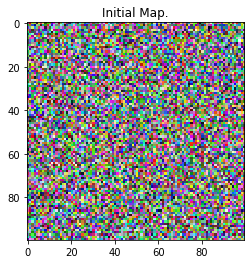

In [10]:
plt.title("Initial Map.")
plt.imshow(som)
plt.show()

## Graphs for Sigma0 = 1

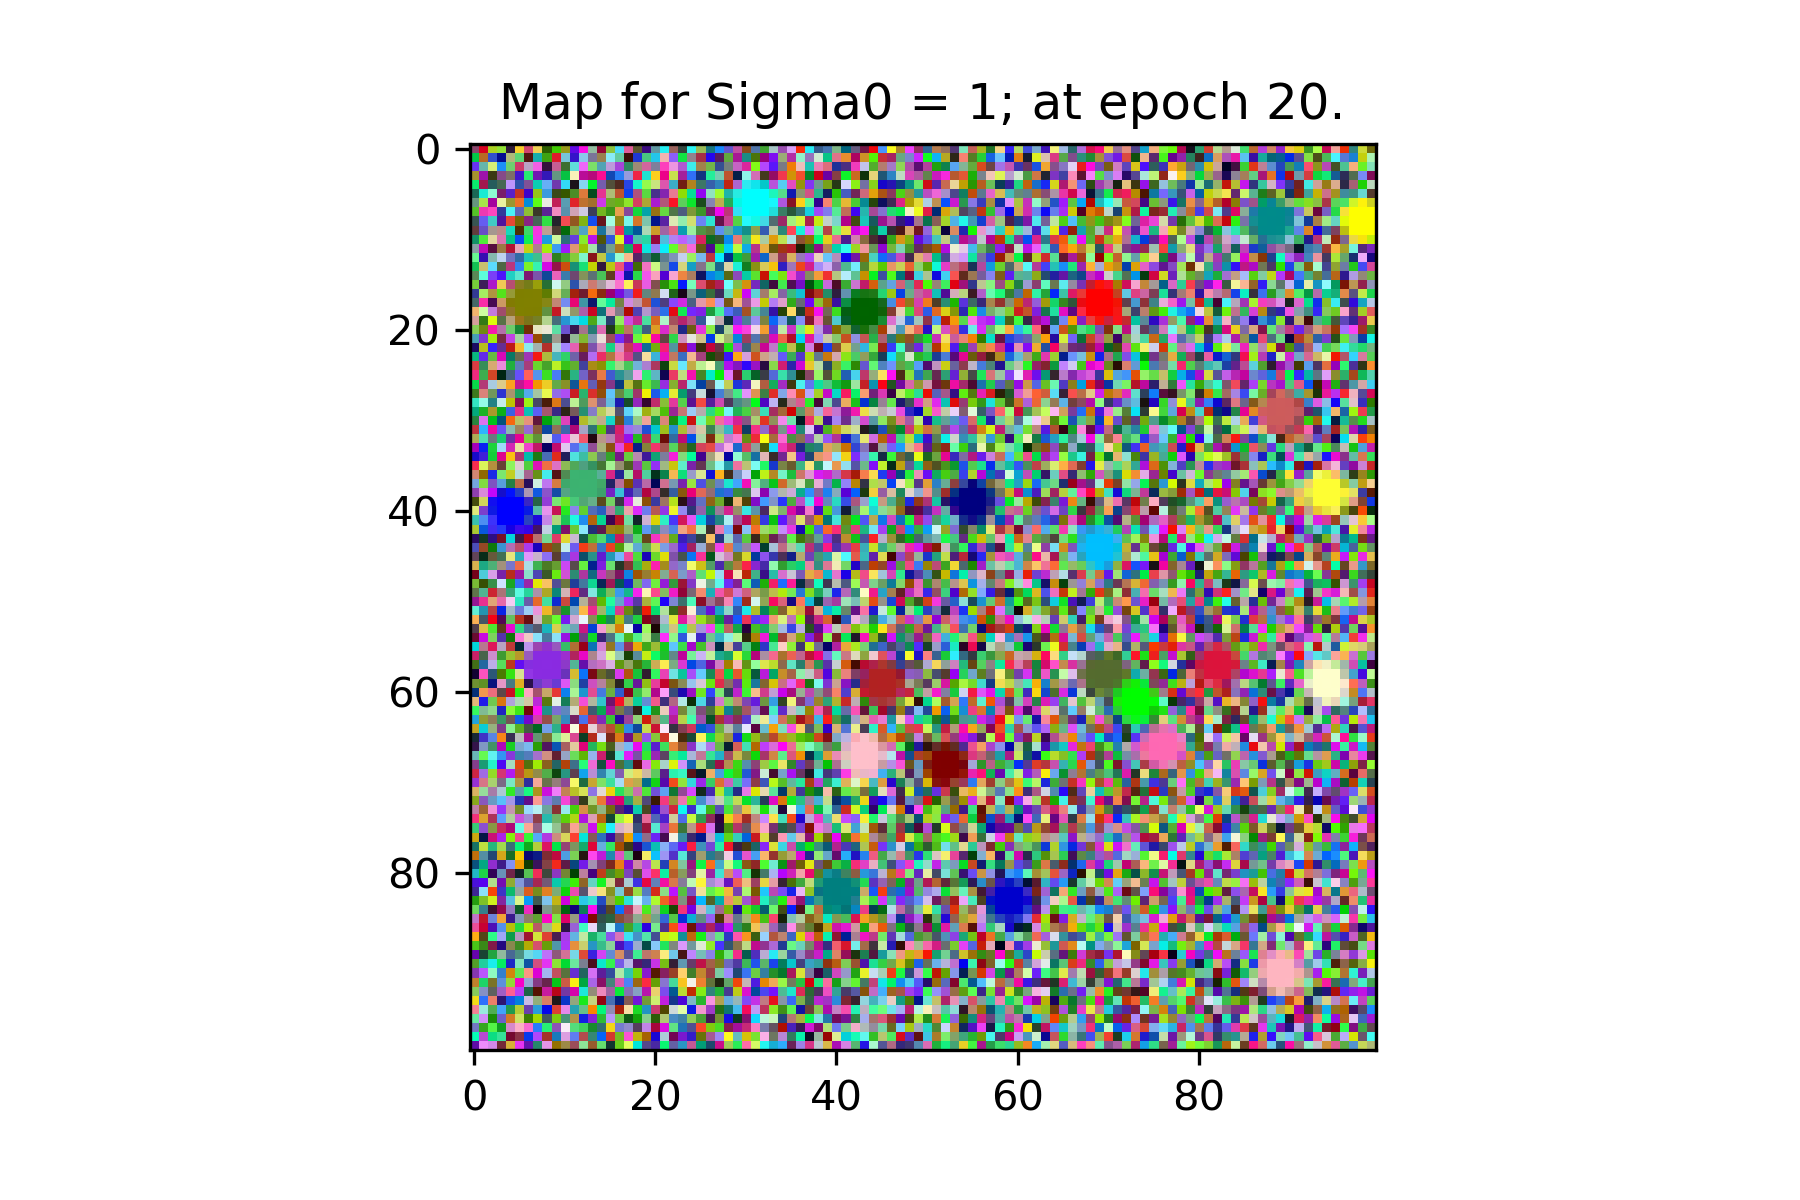

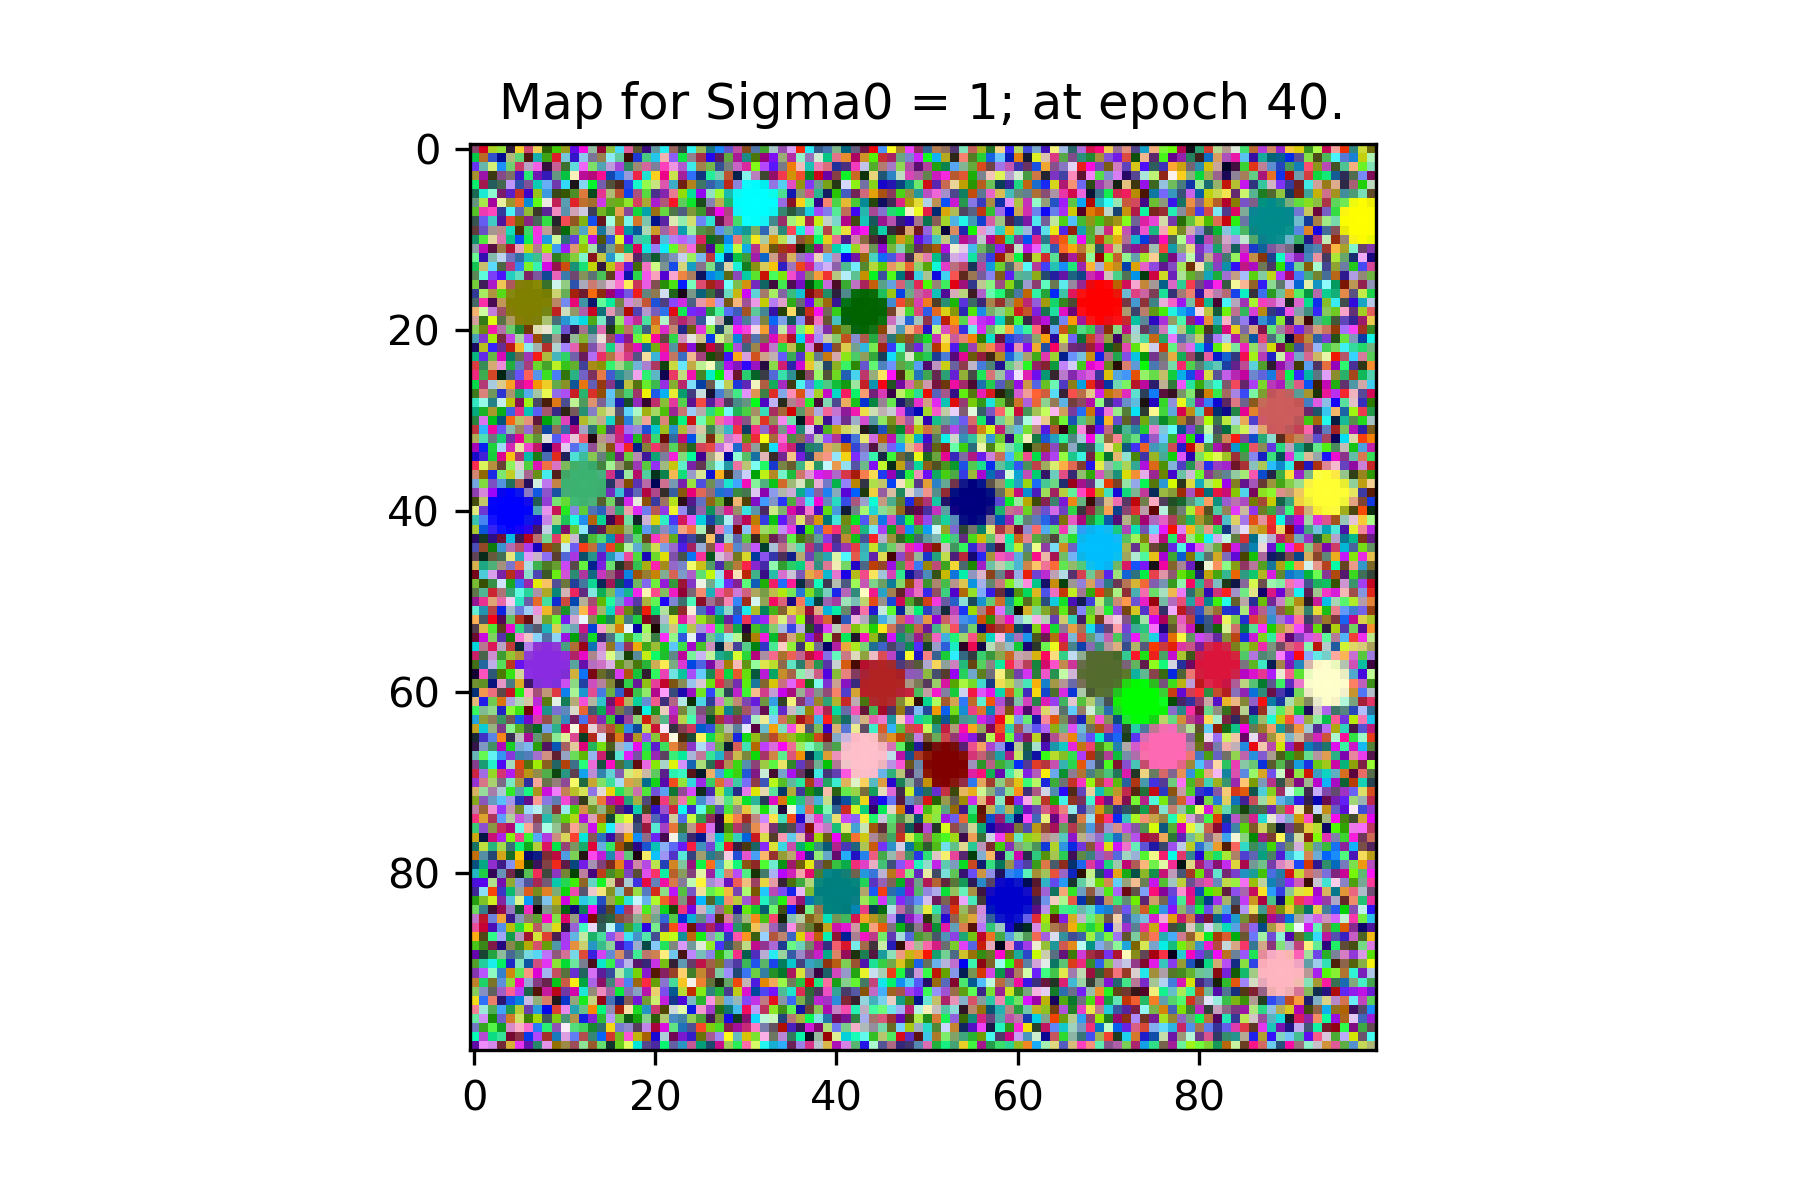

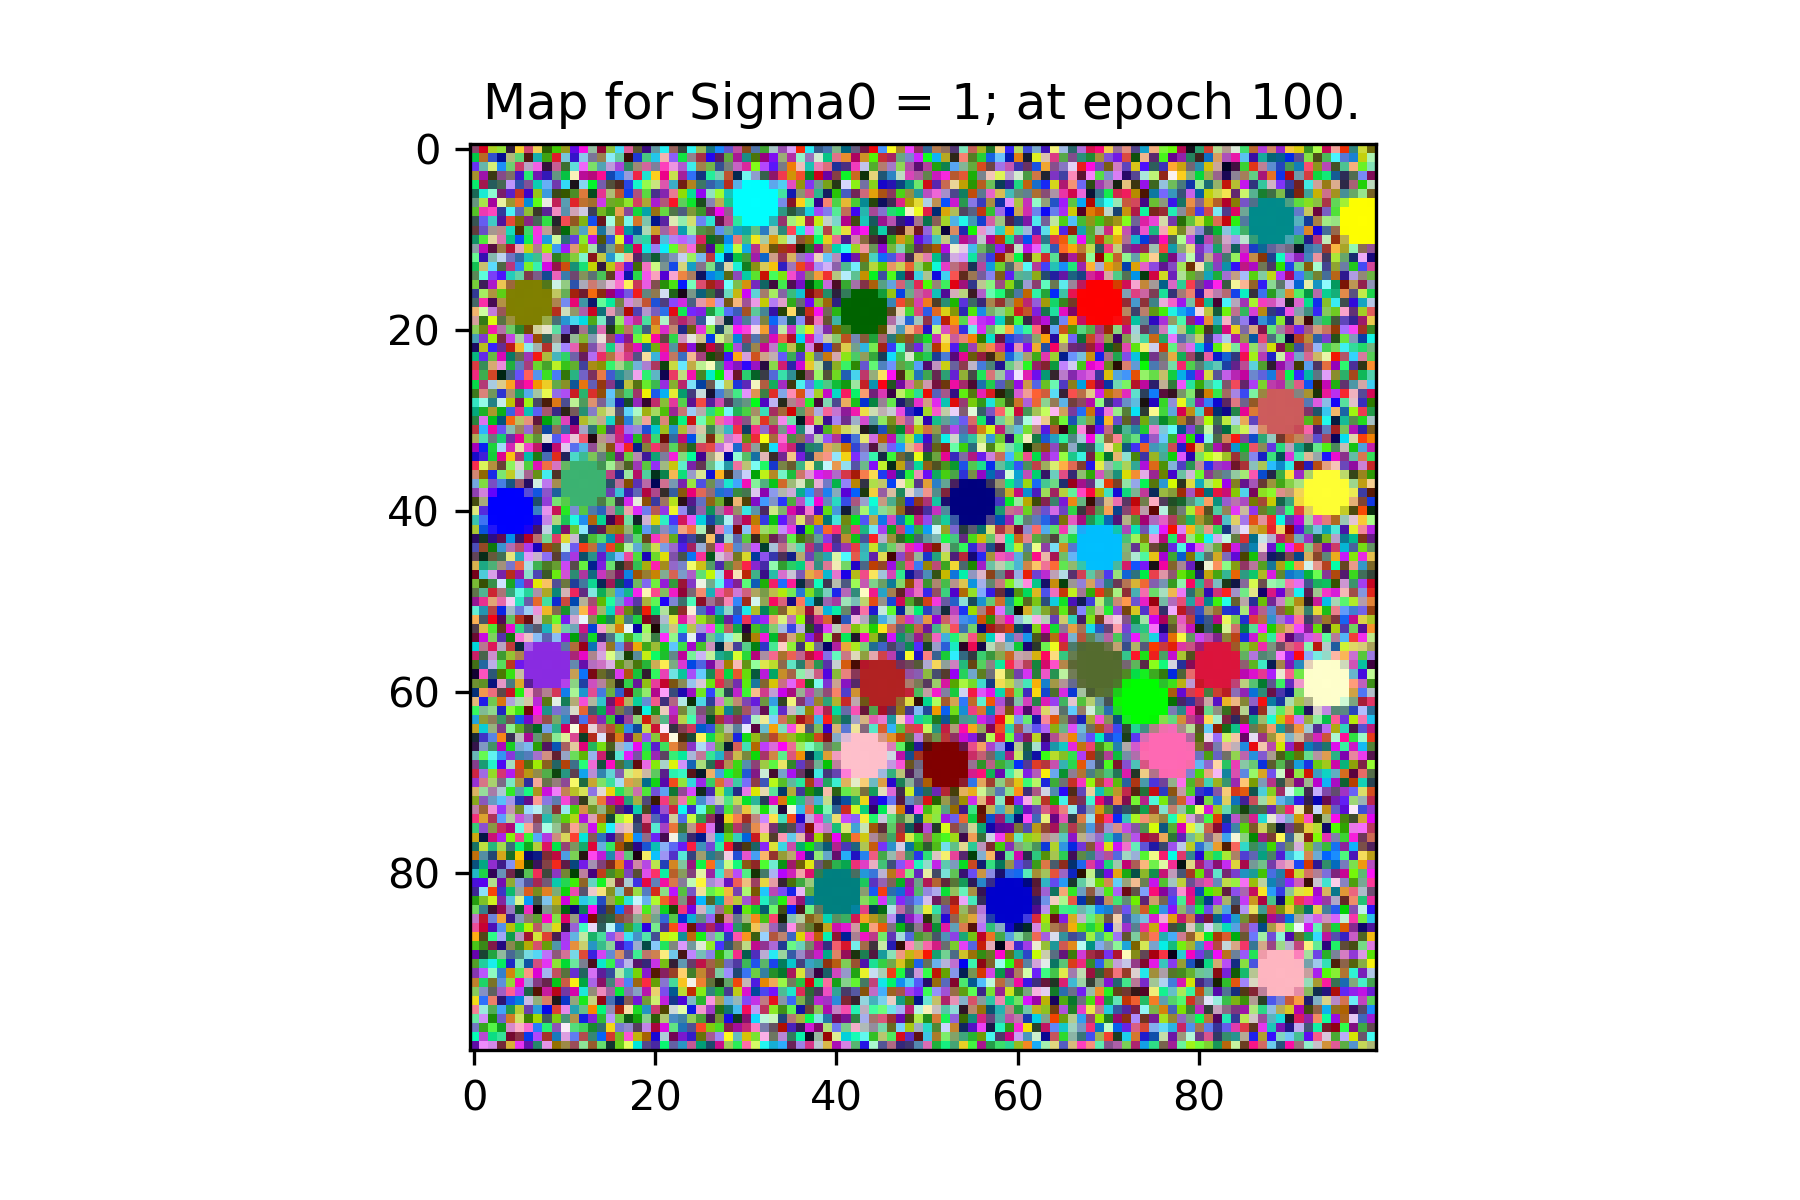

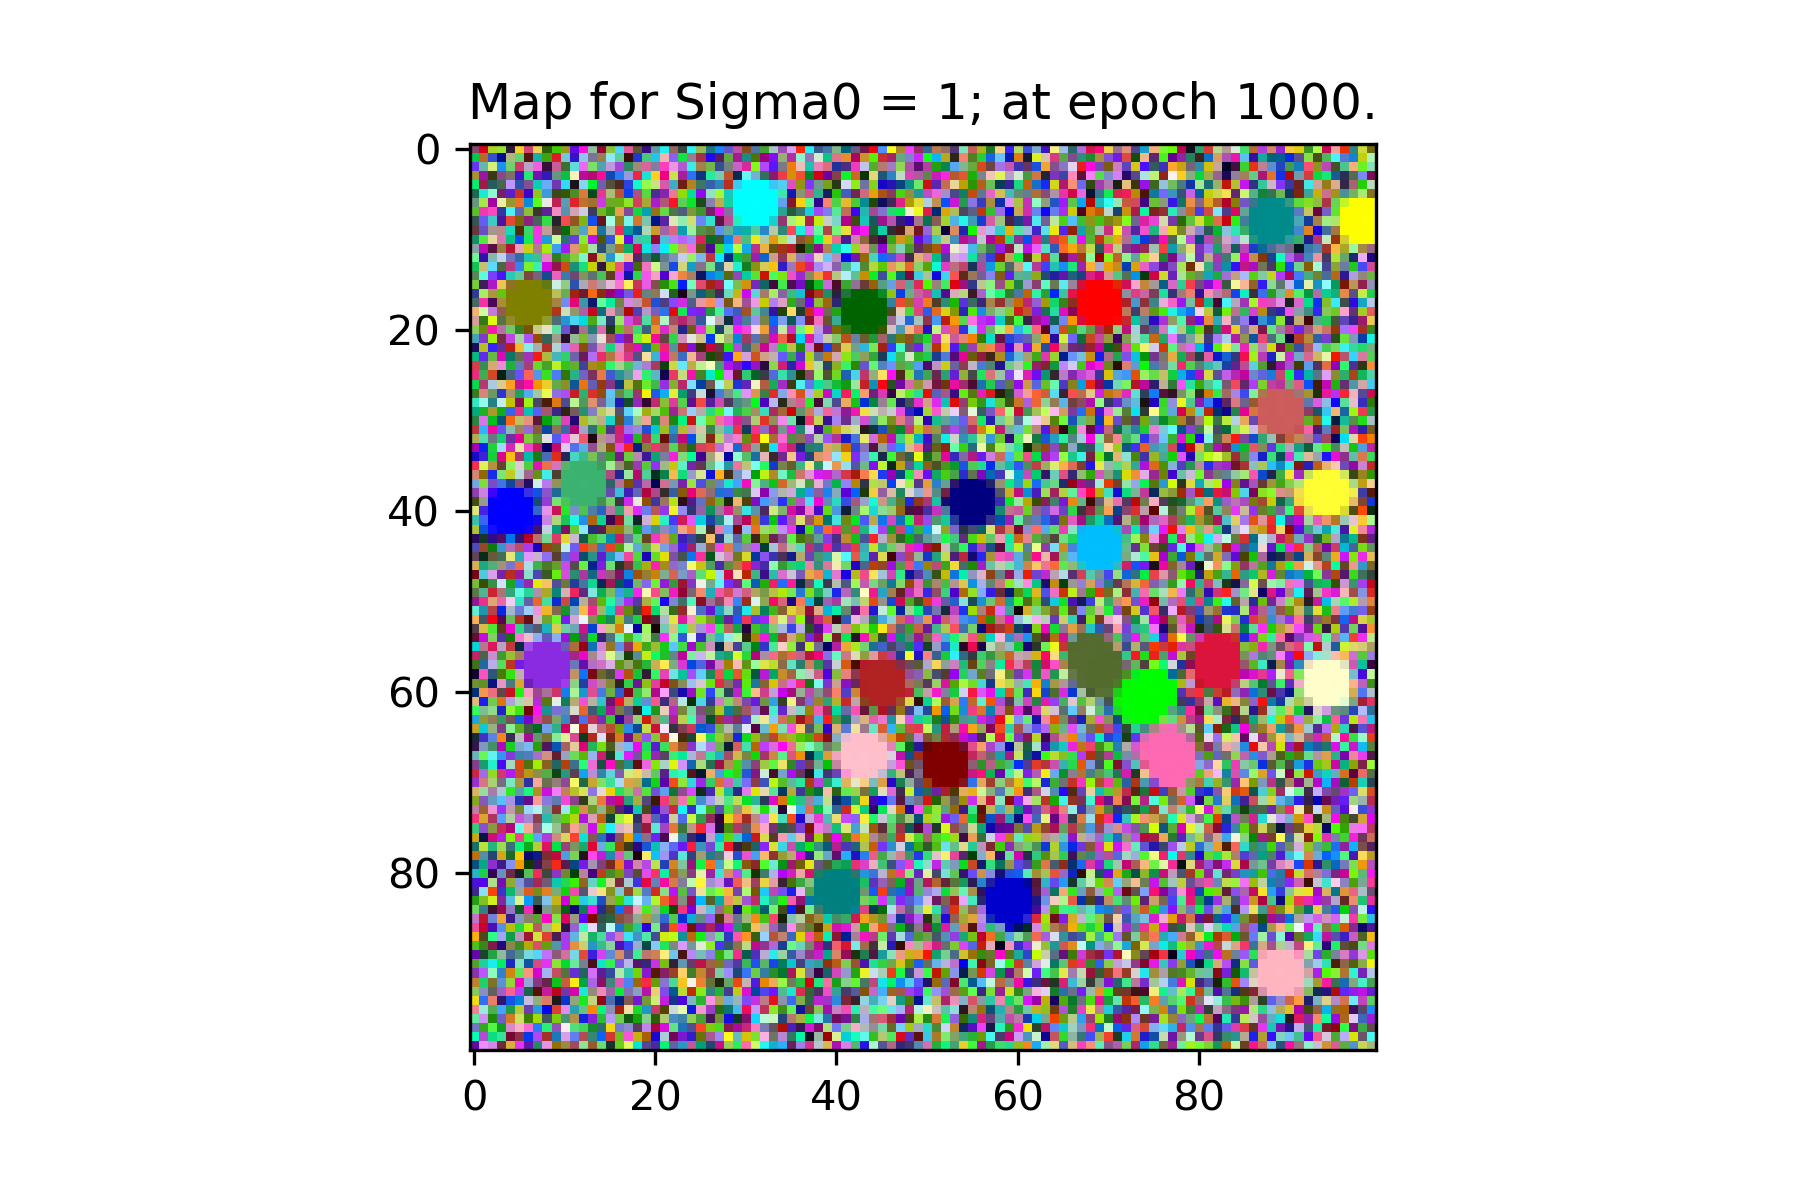

## Graphs for Sigma0 = 10

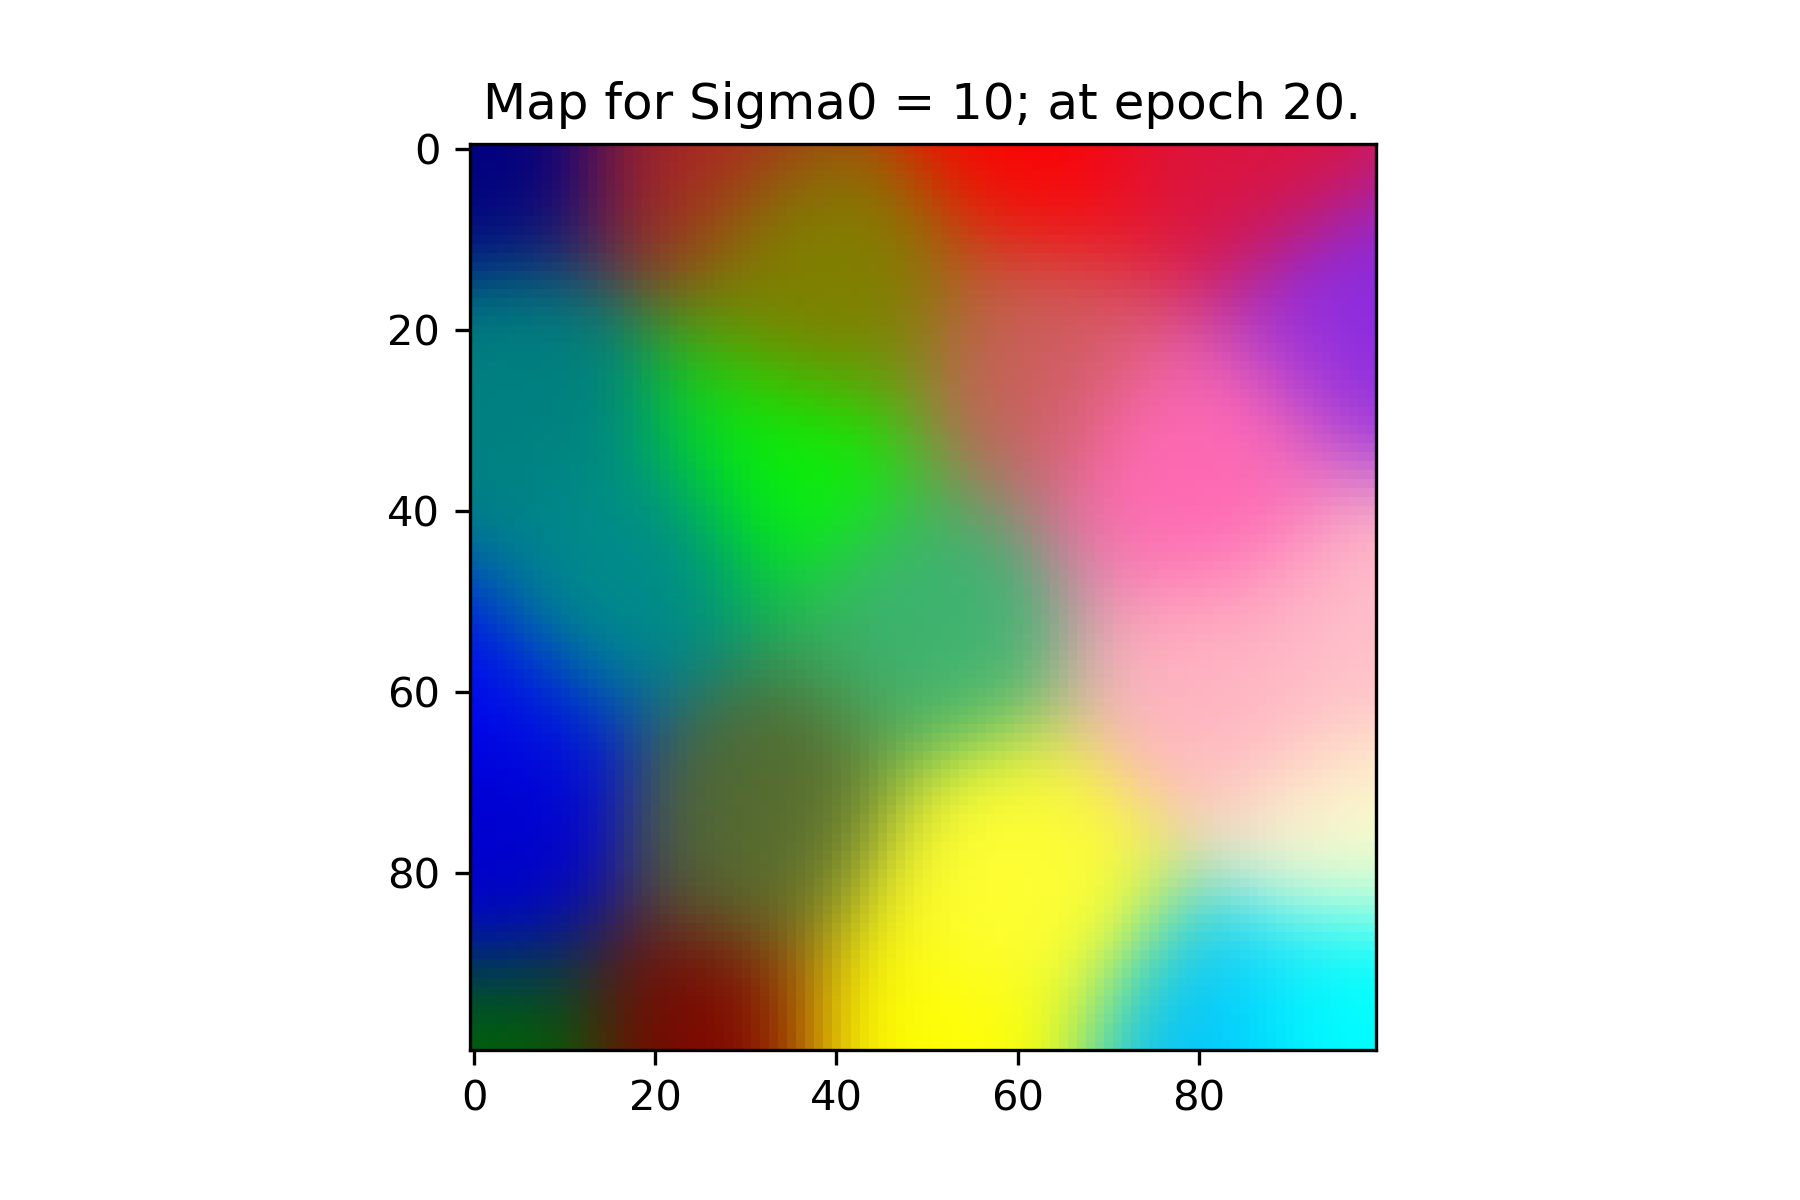

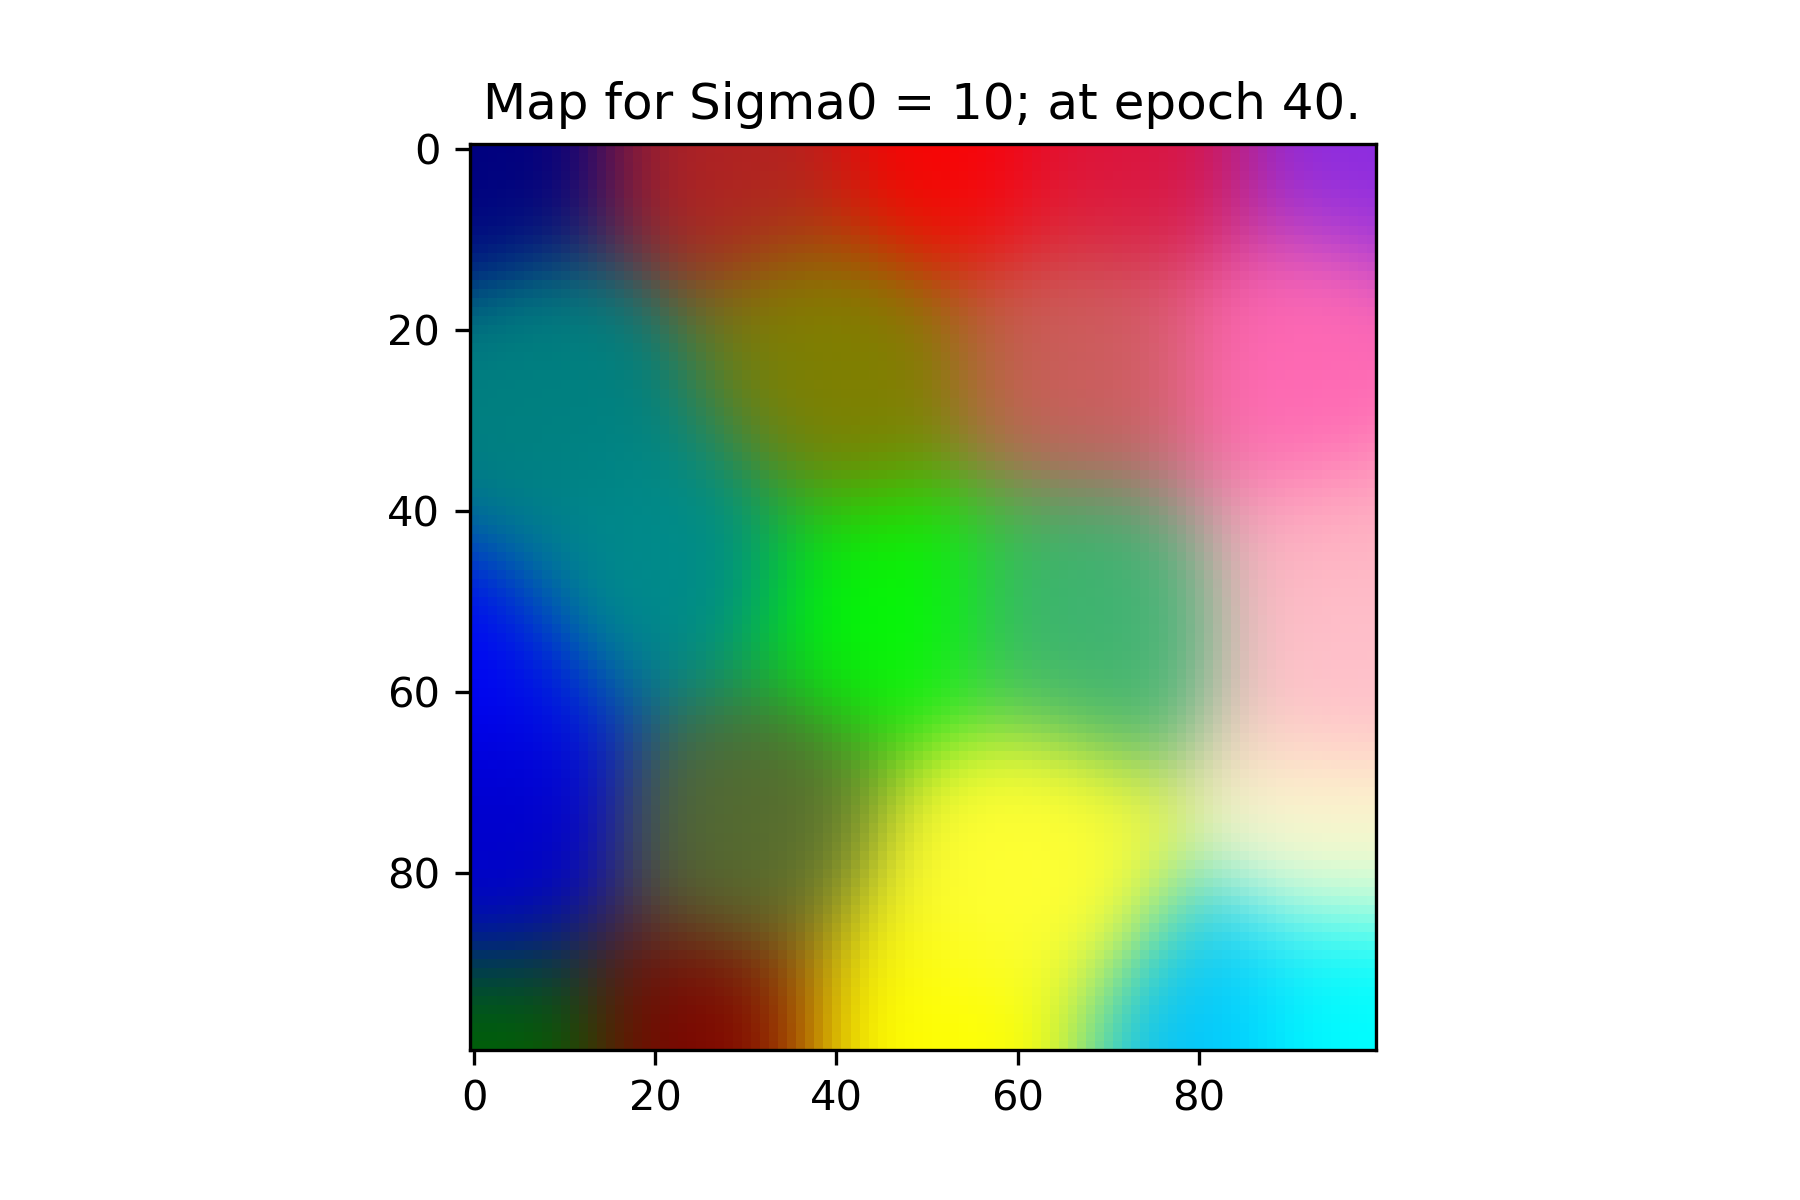

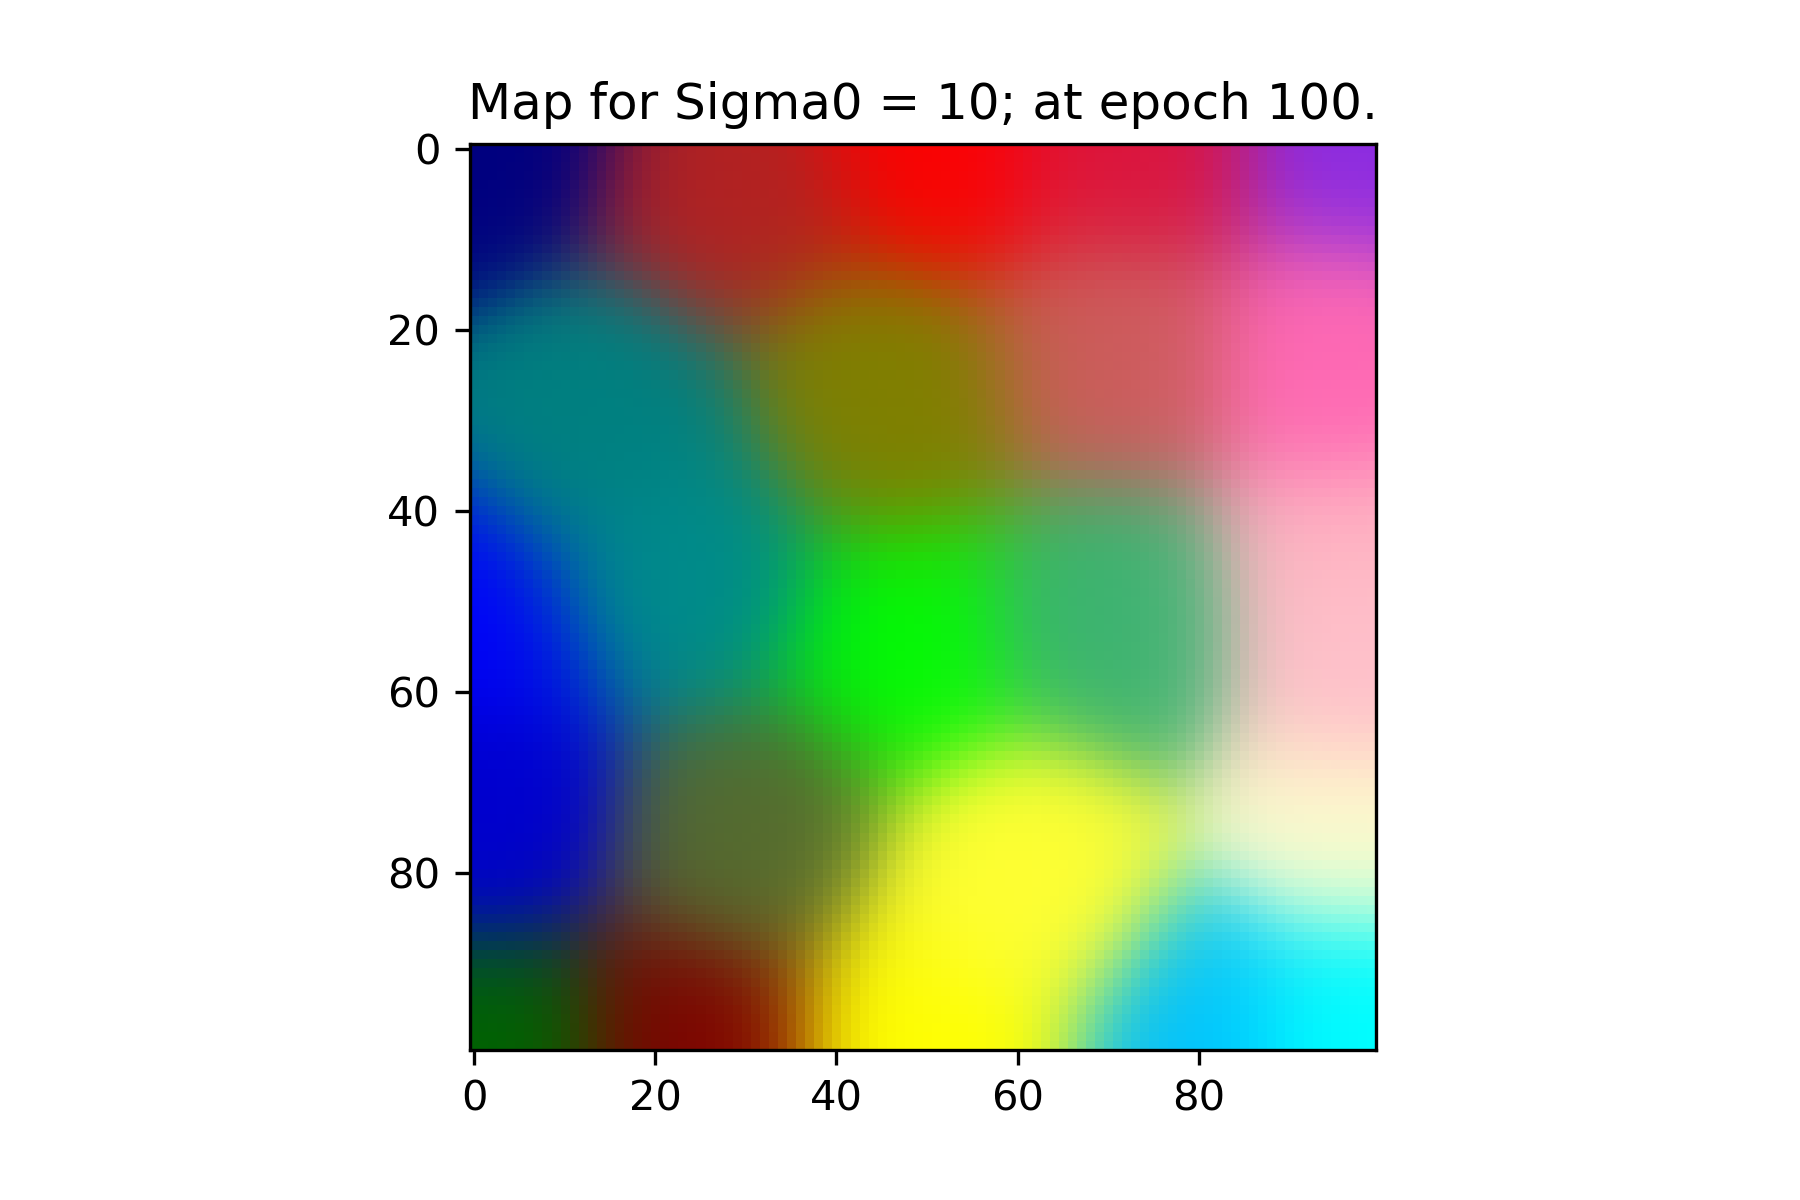

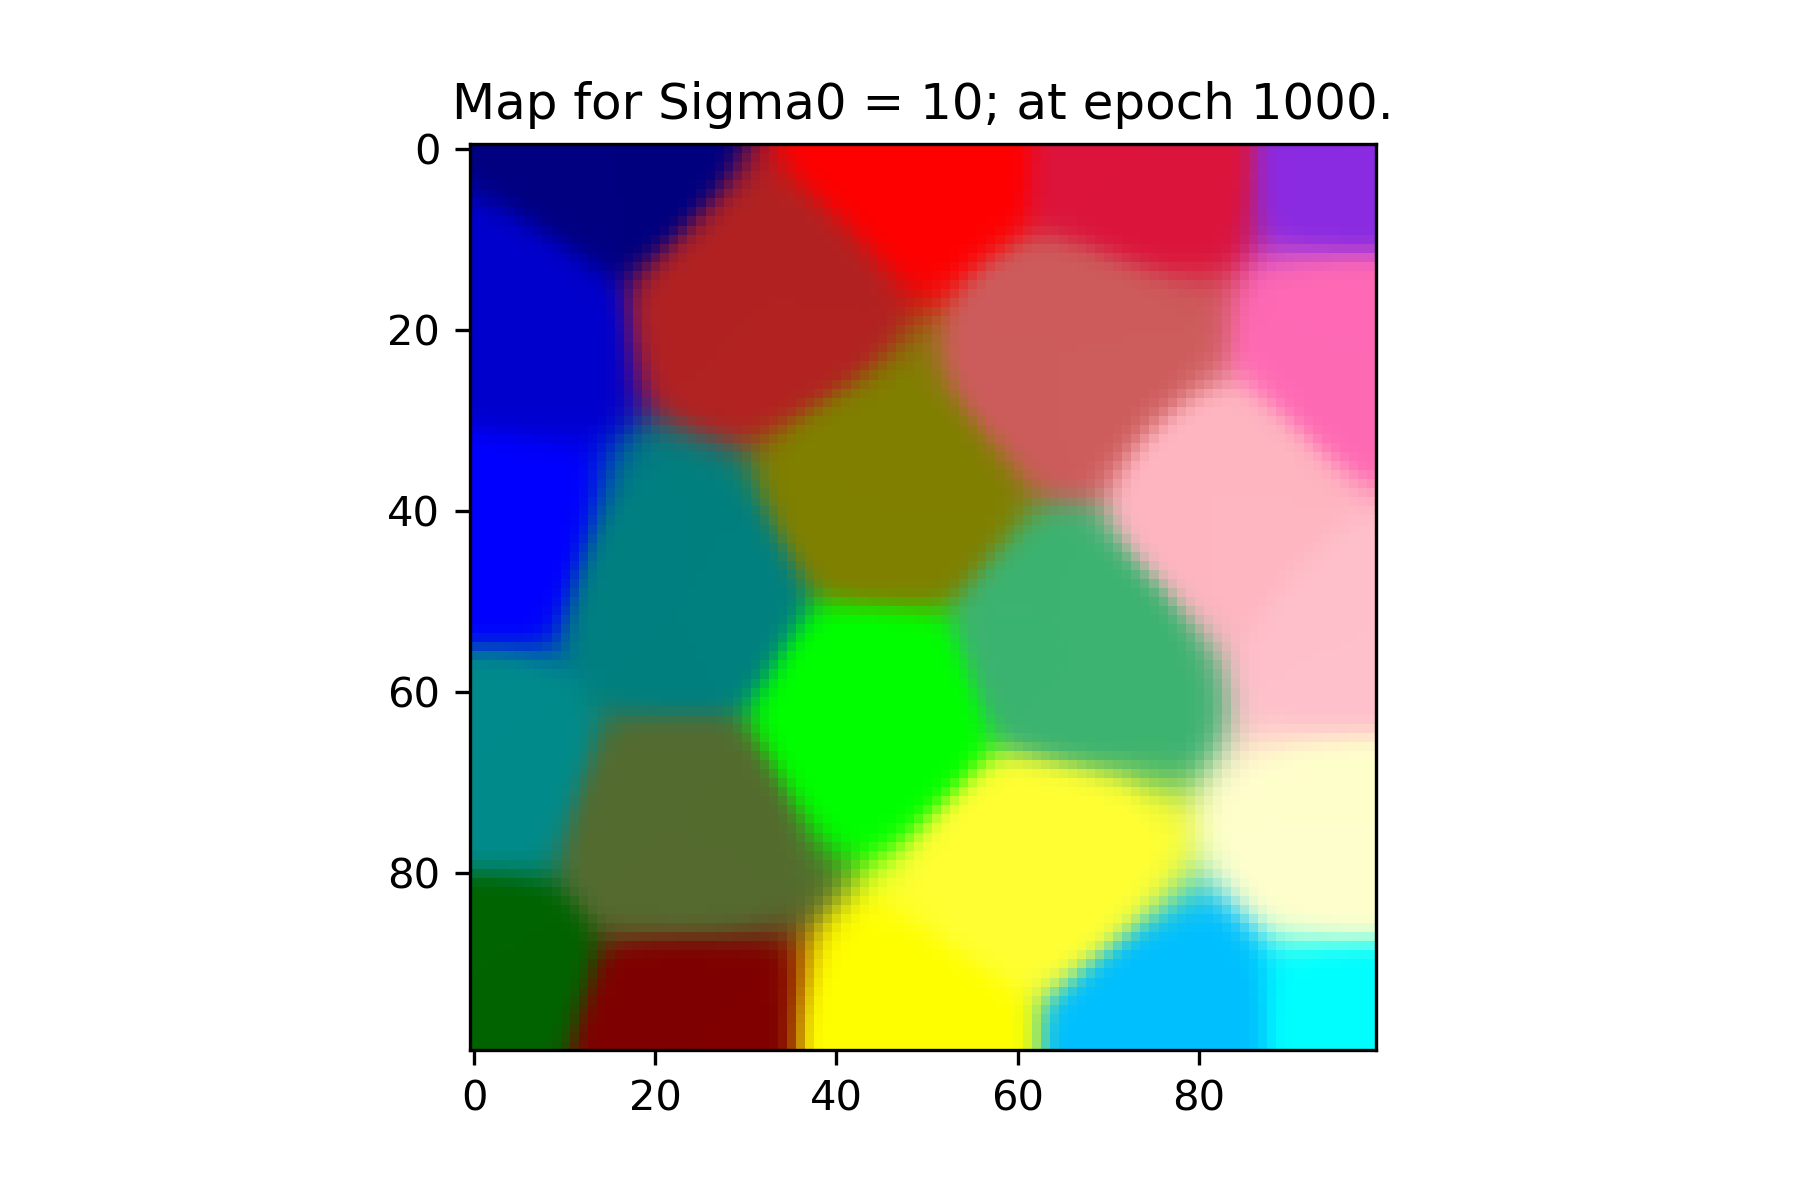

## Graphs for Sigma0 = 30

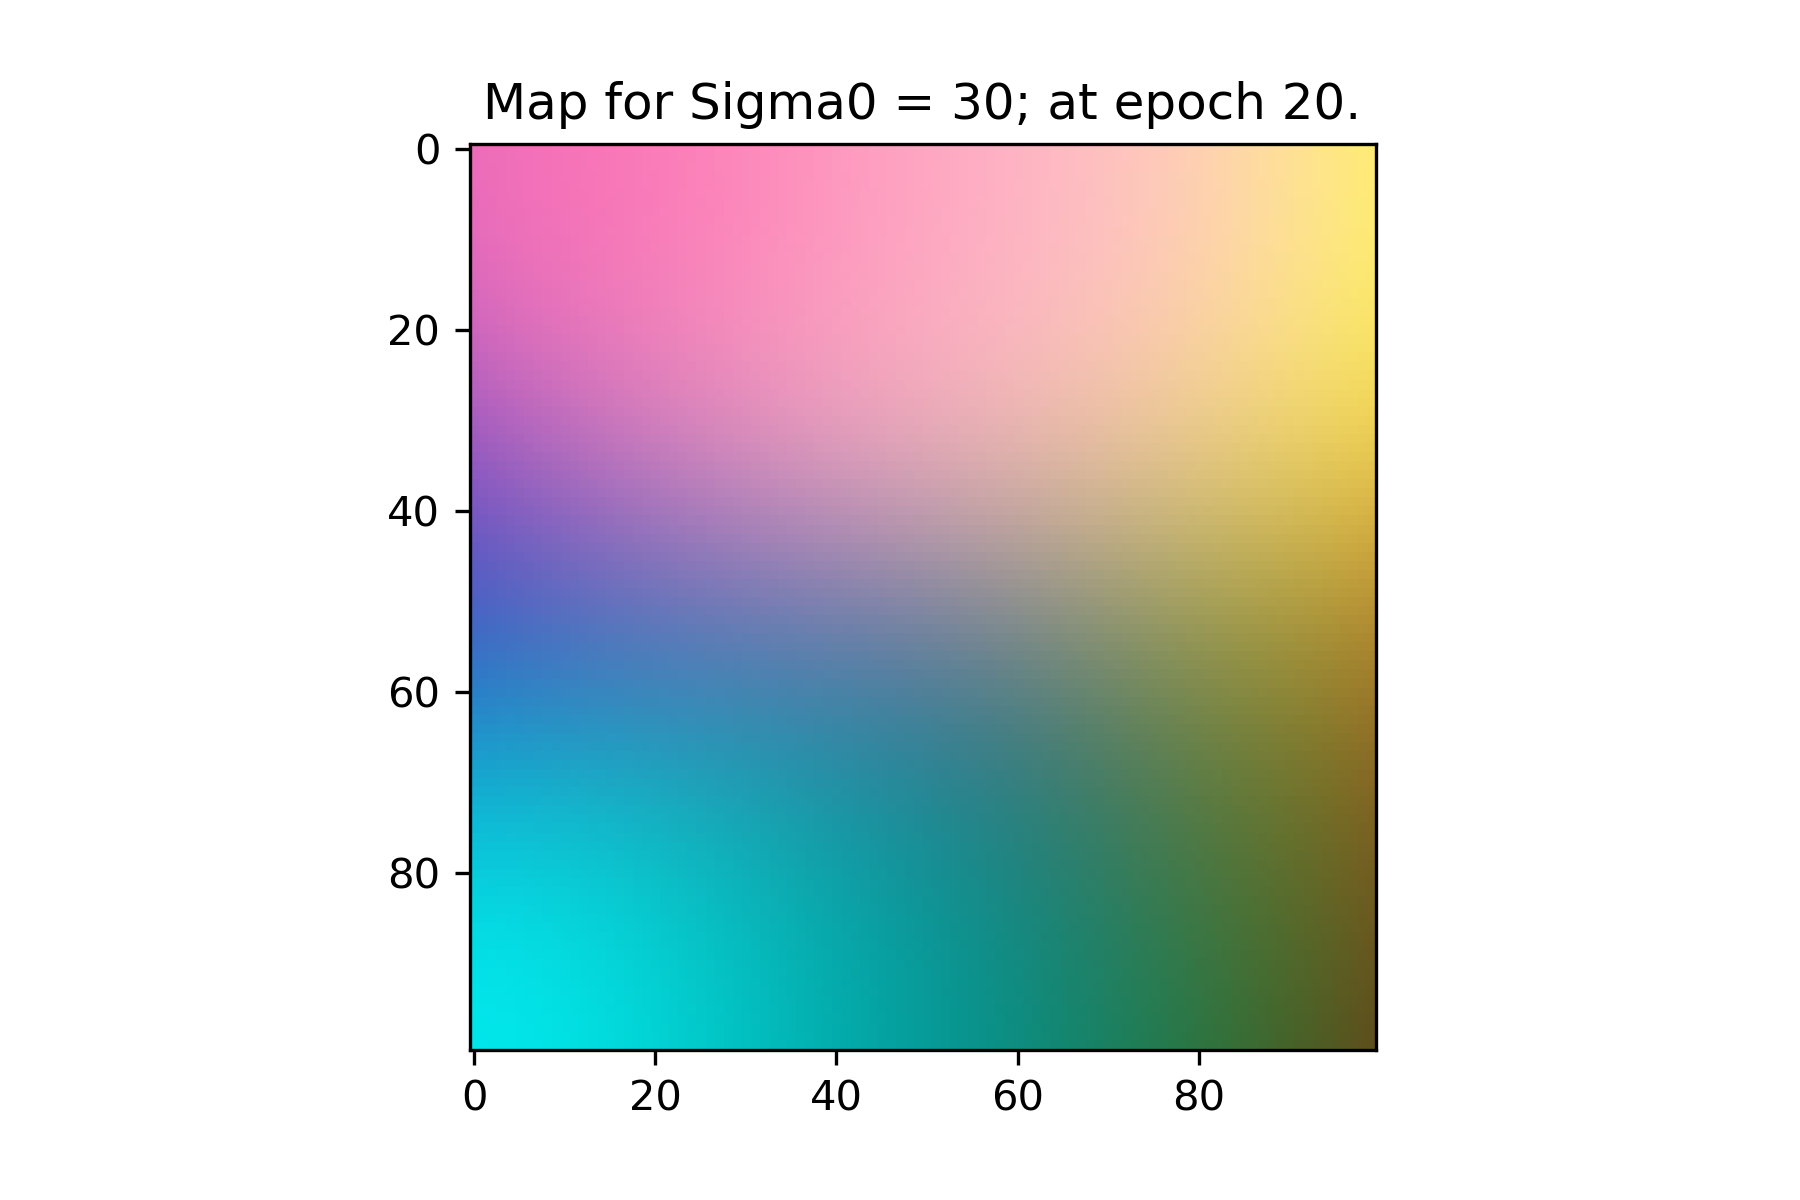

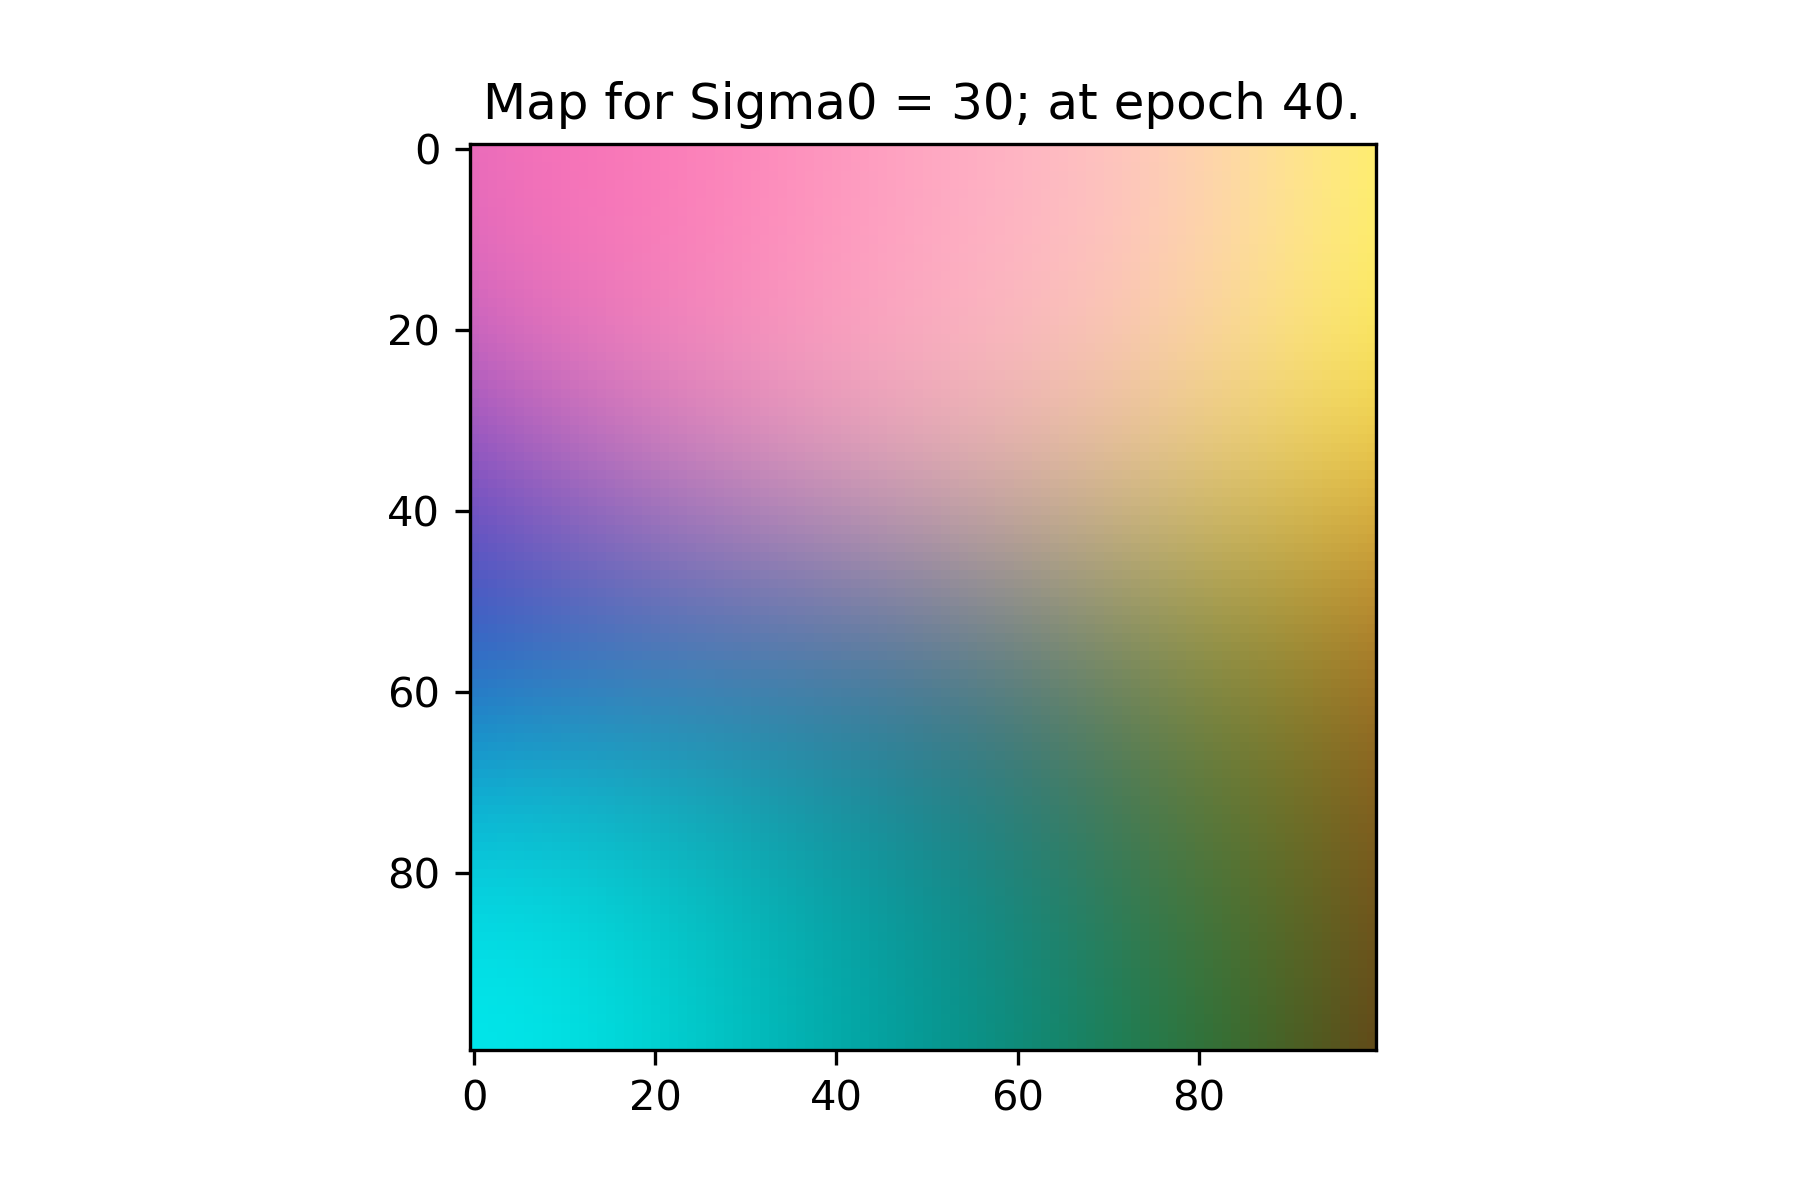

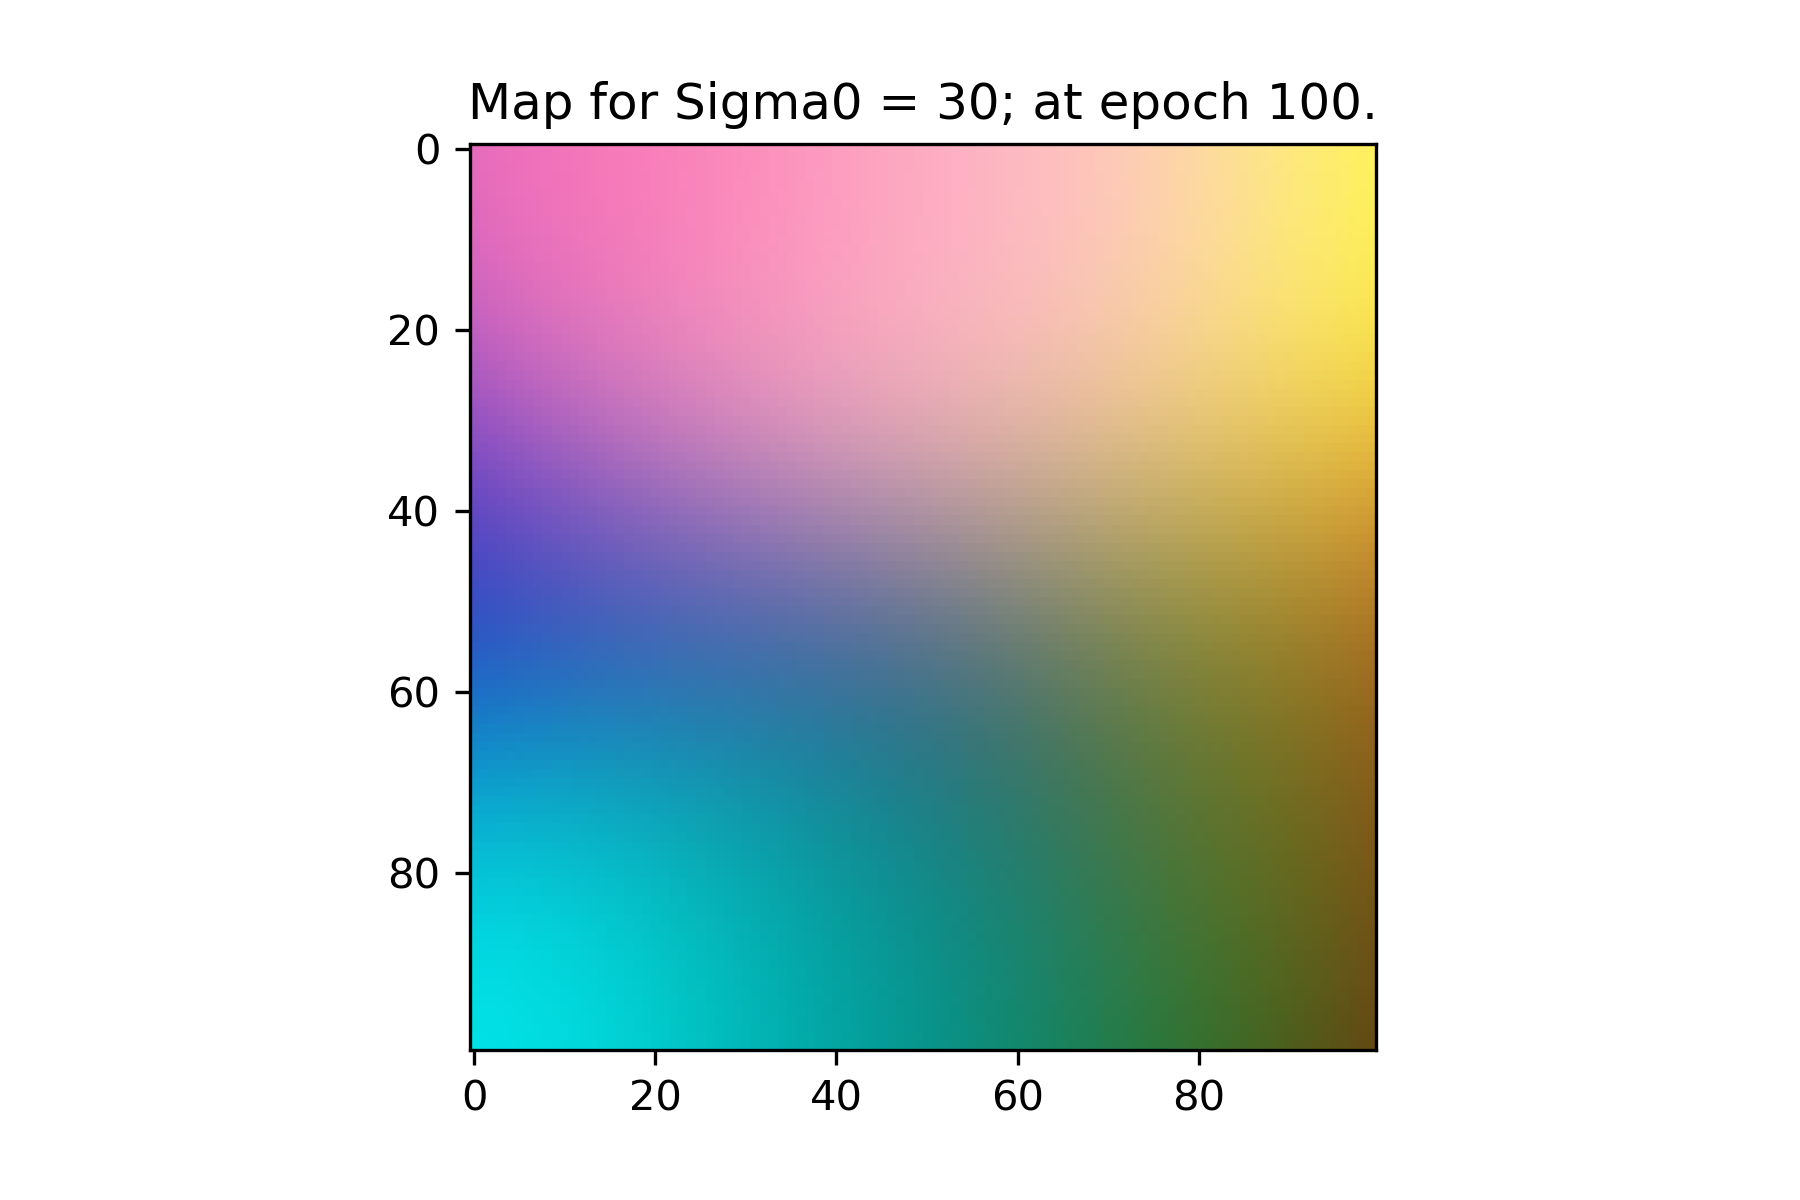

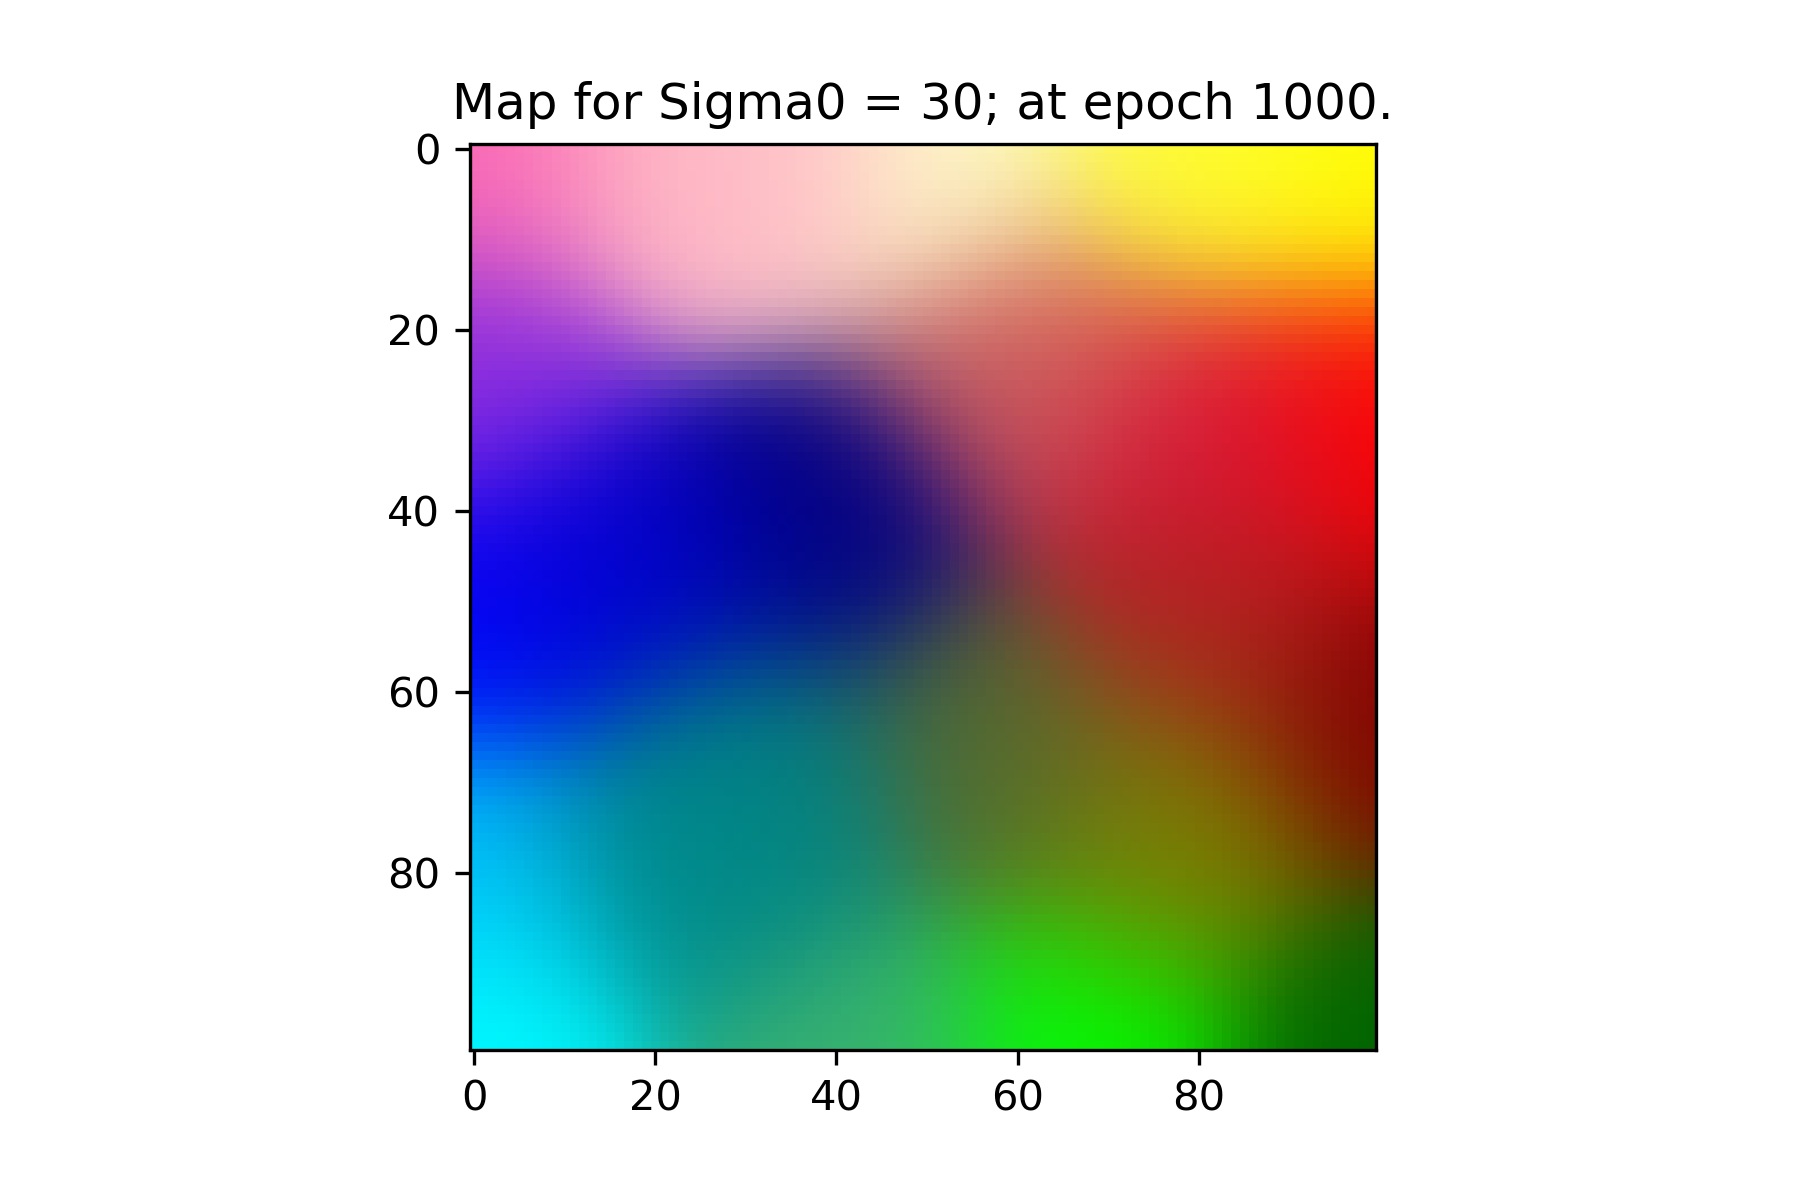

## Graphs for Sigma0 = 50

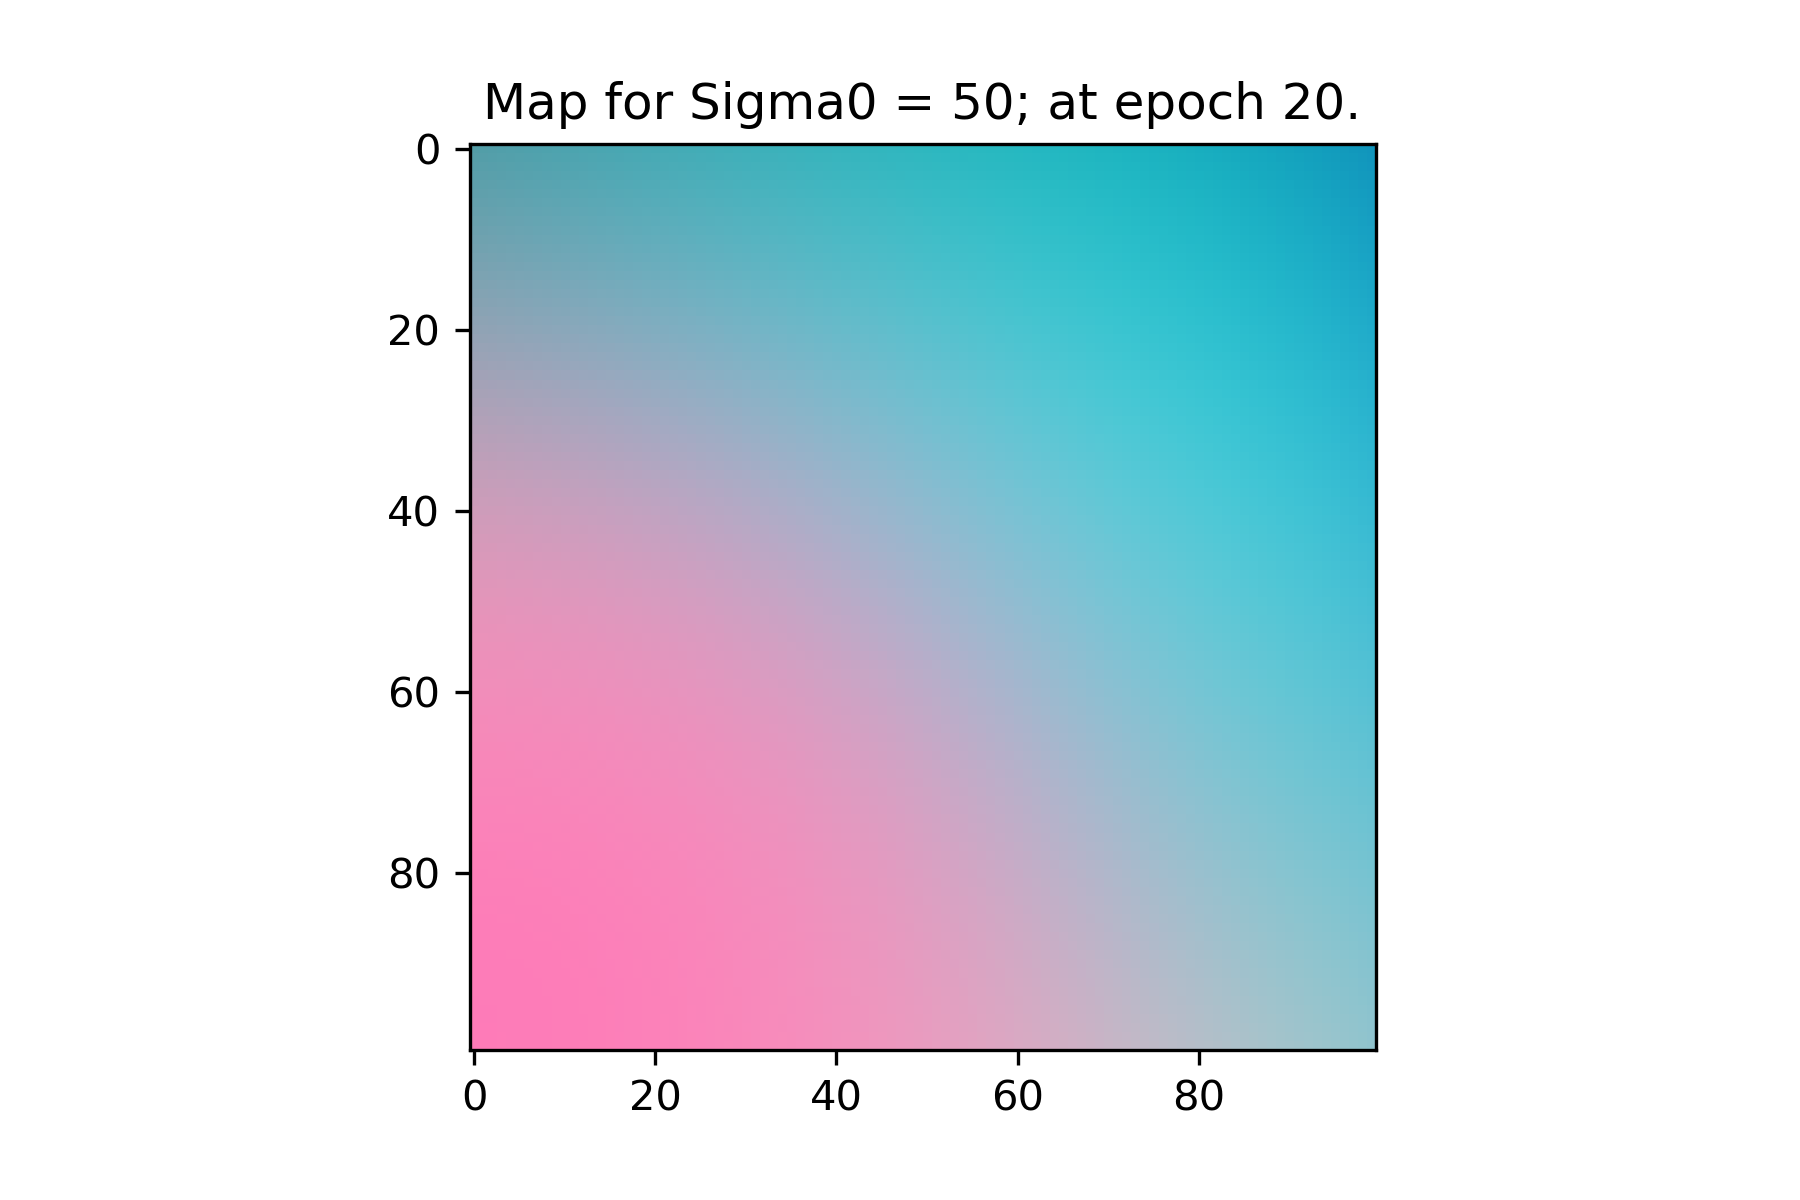

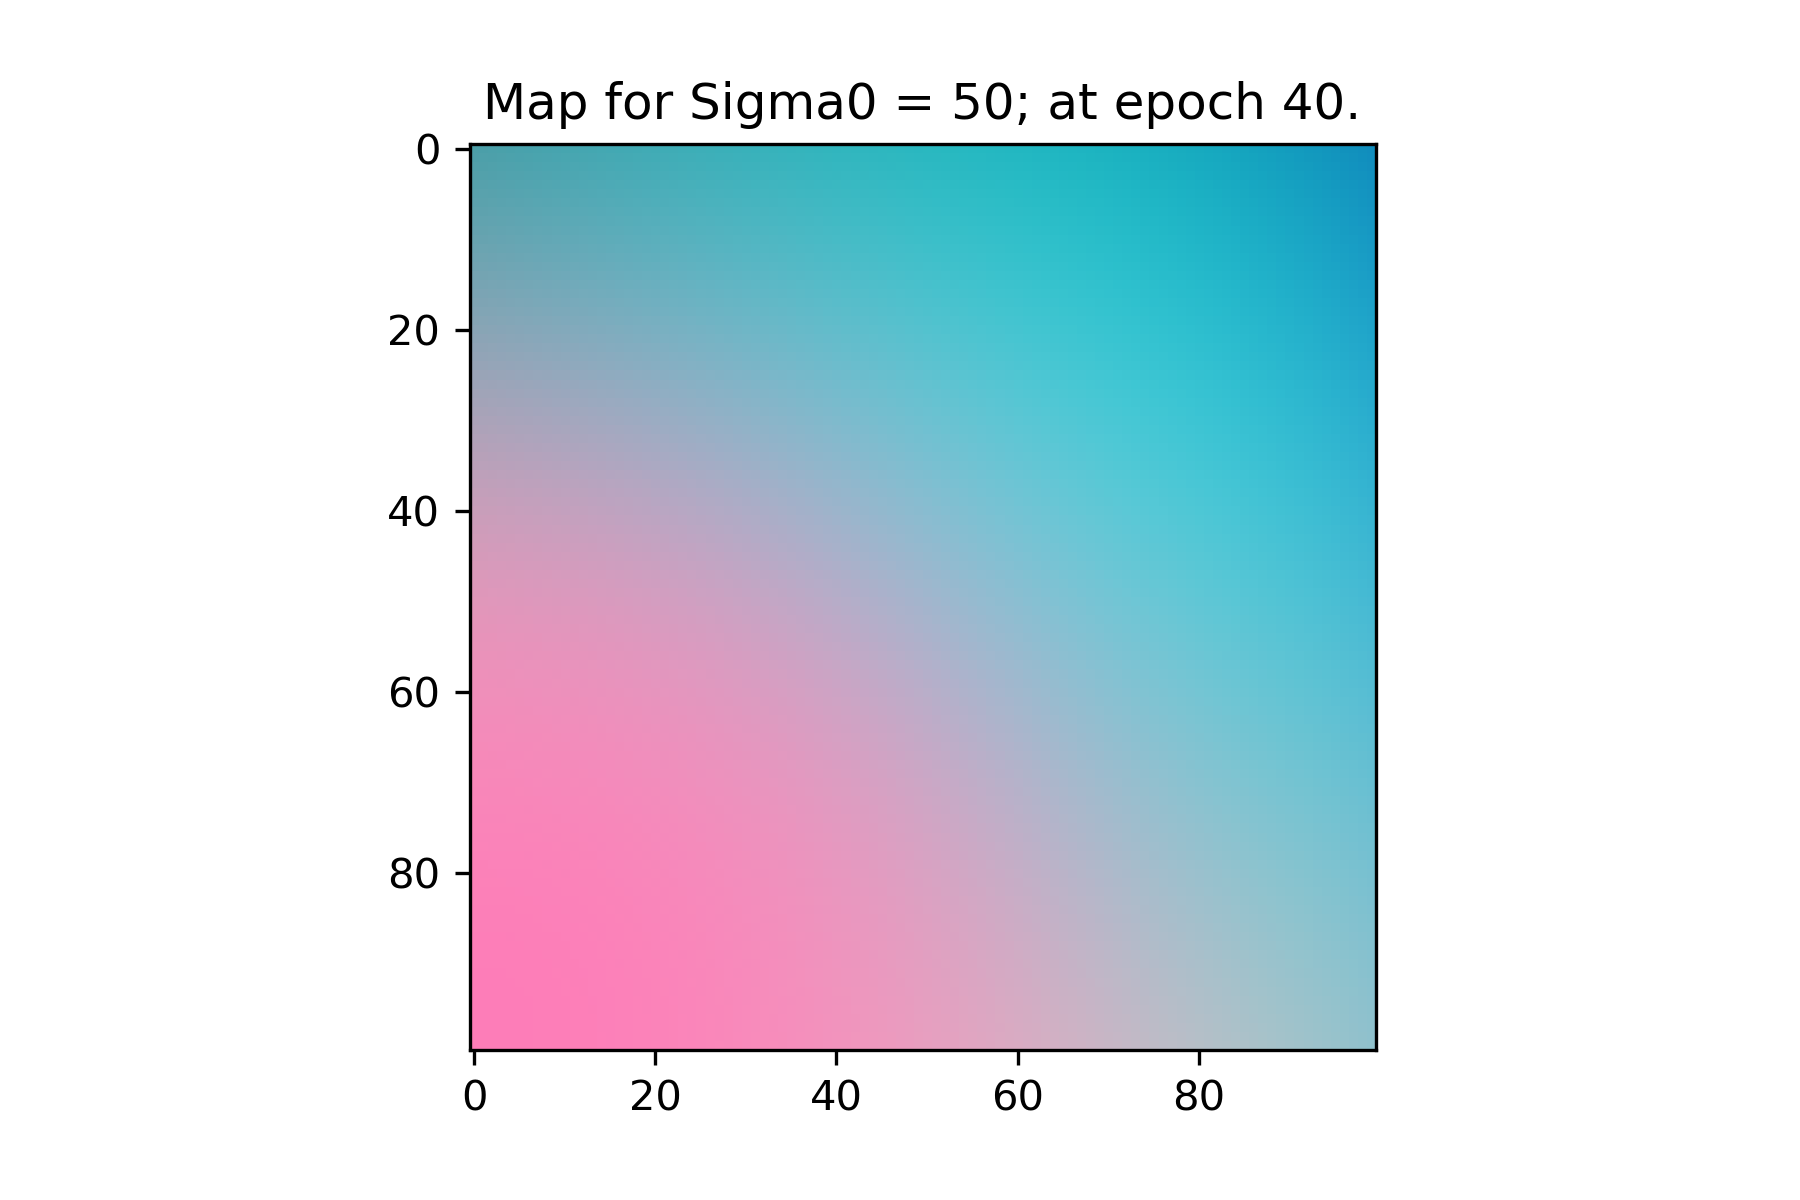

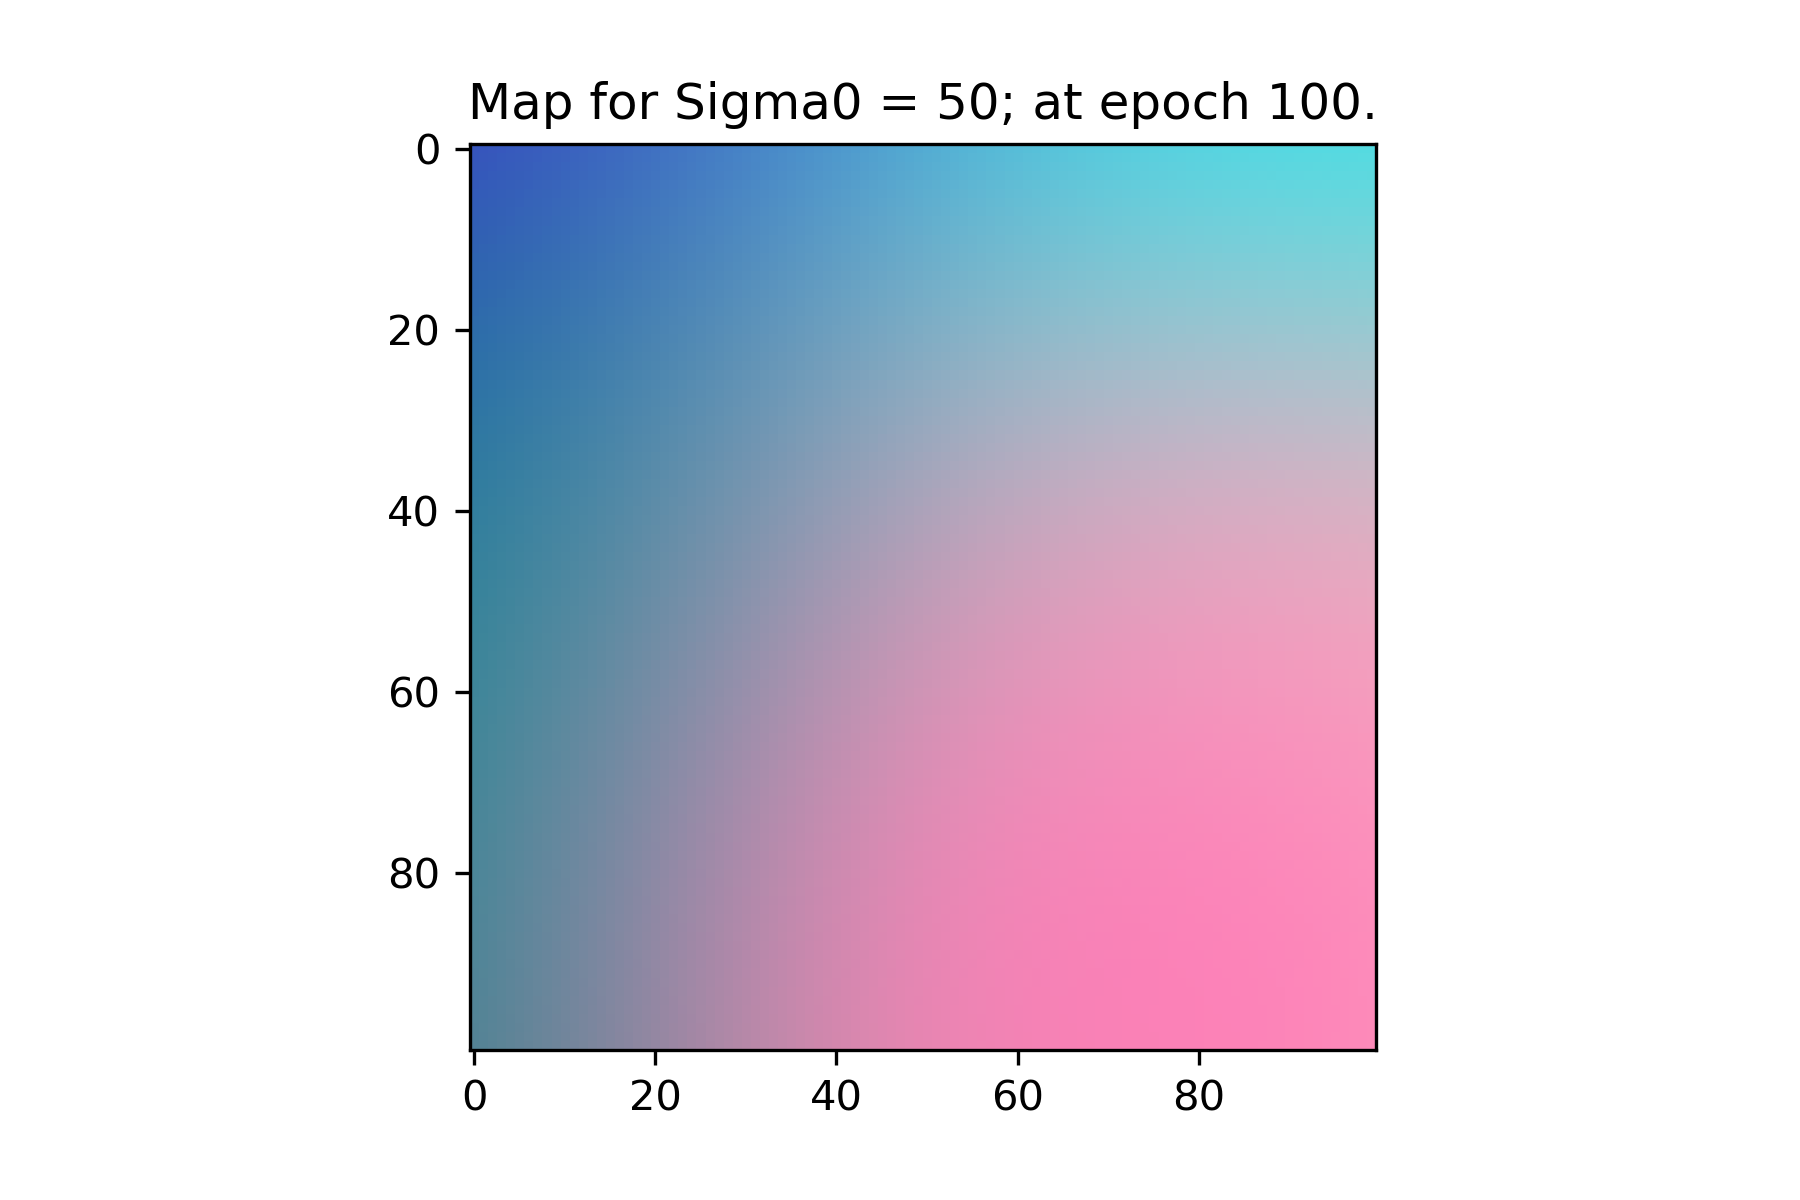

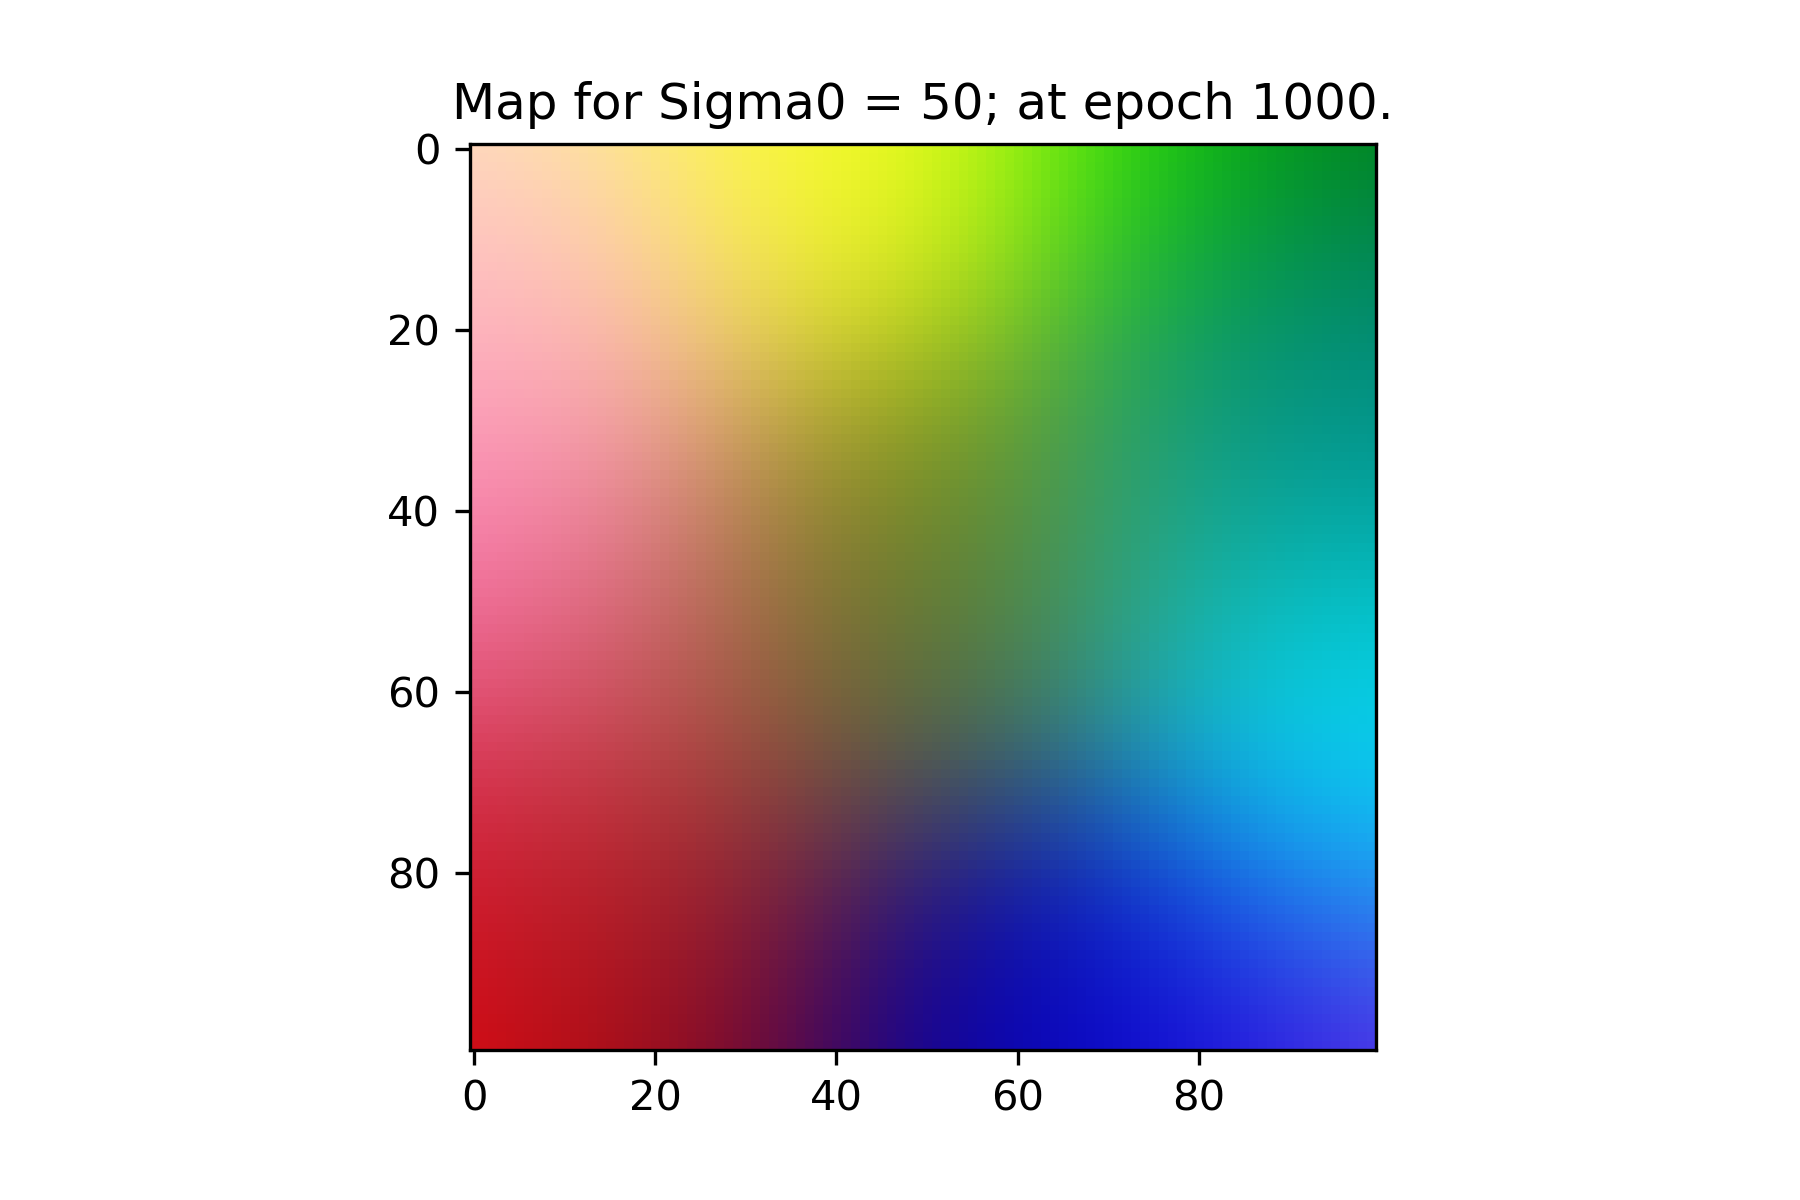

## Graphs for Sigma0 = 70

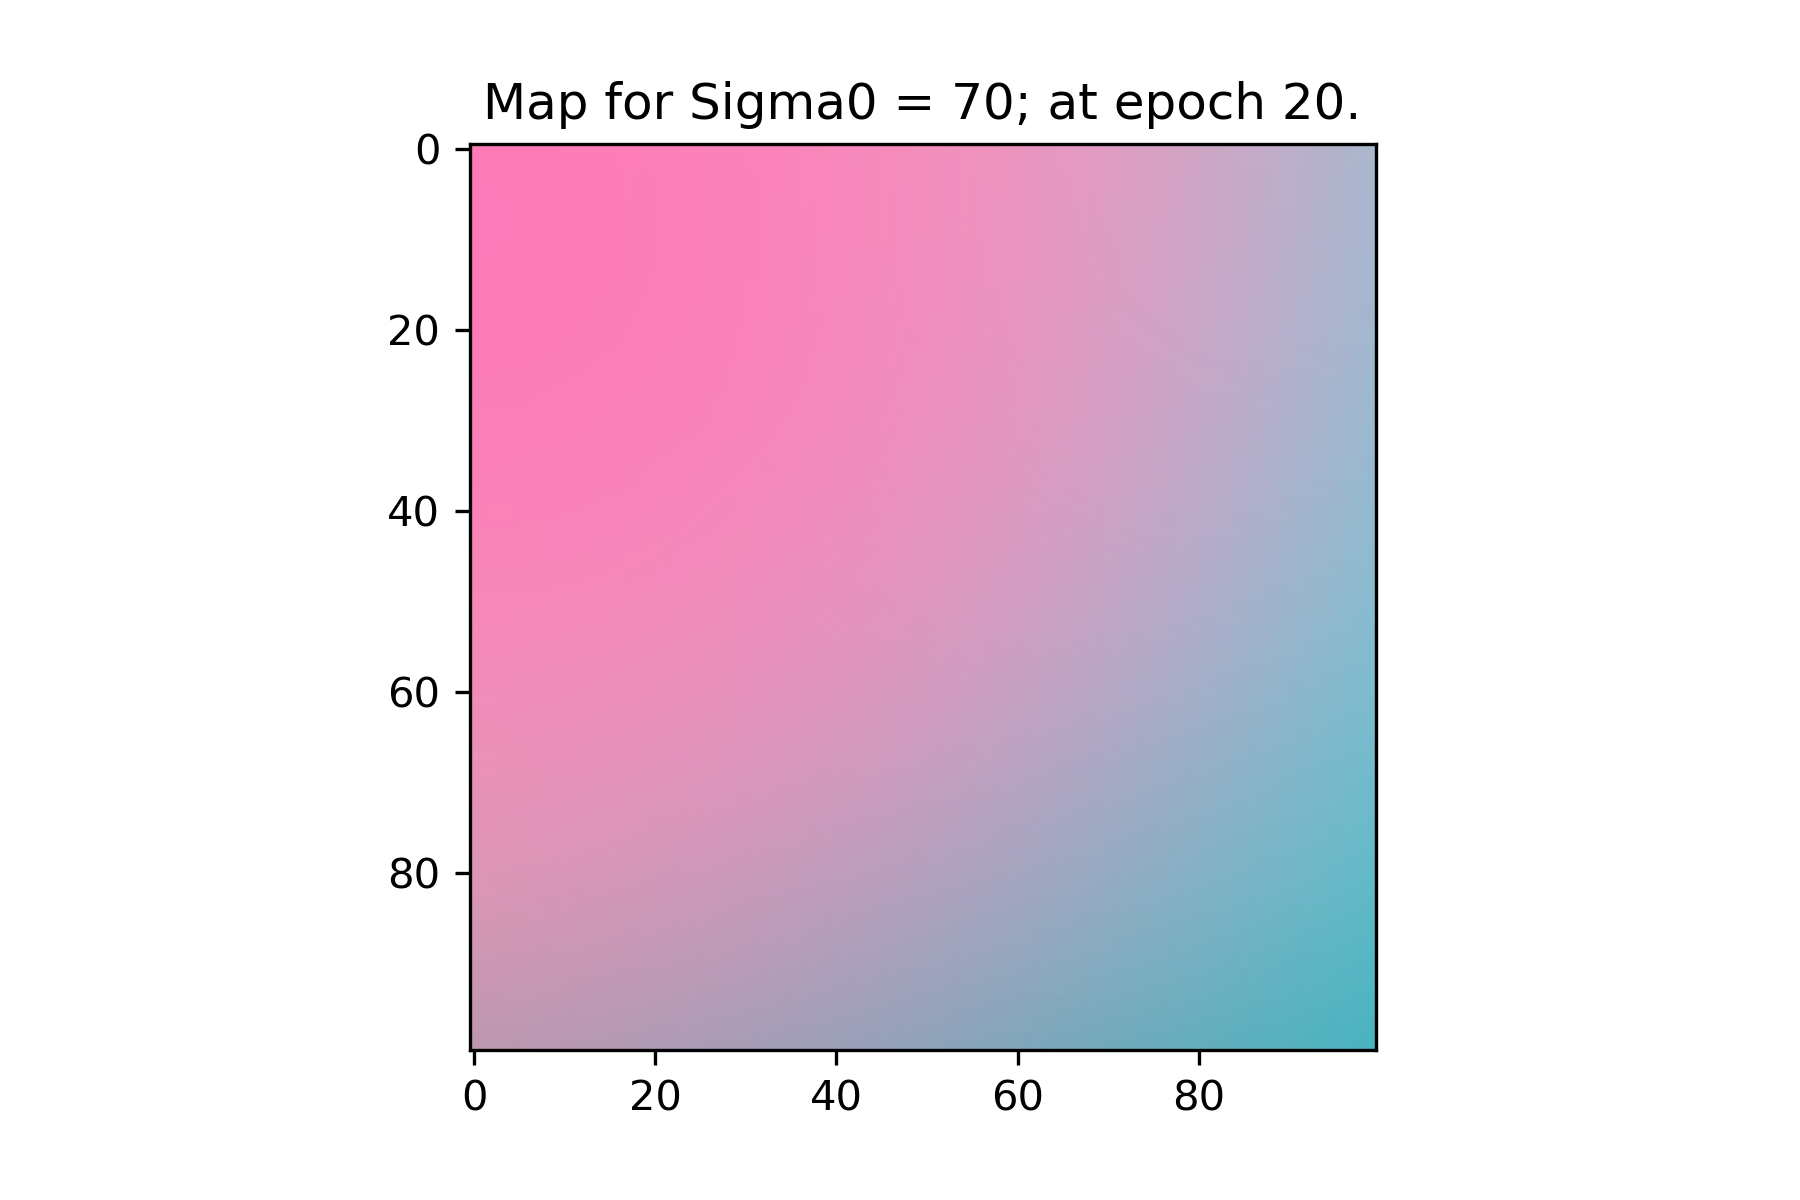

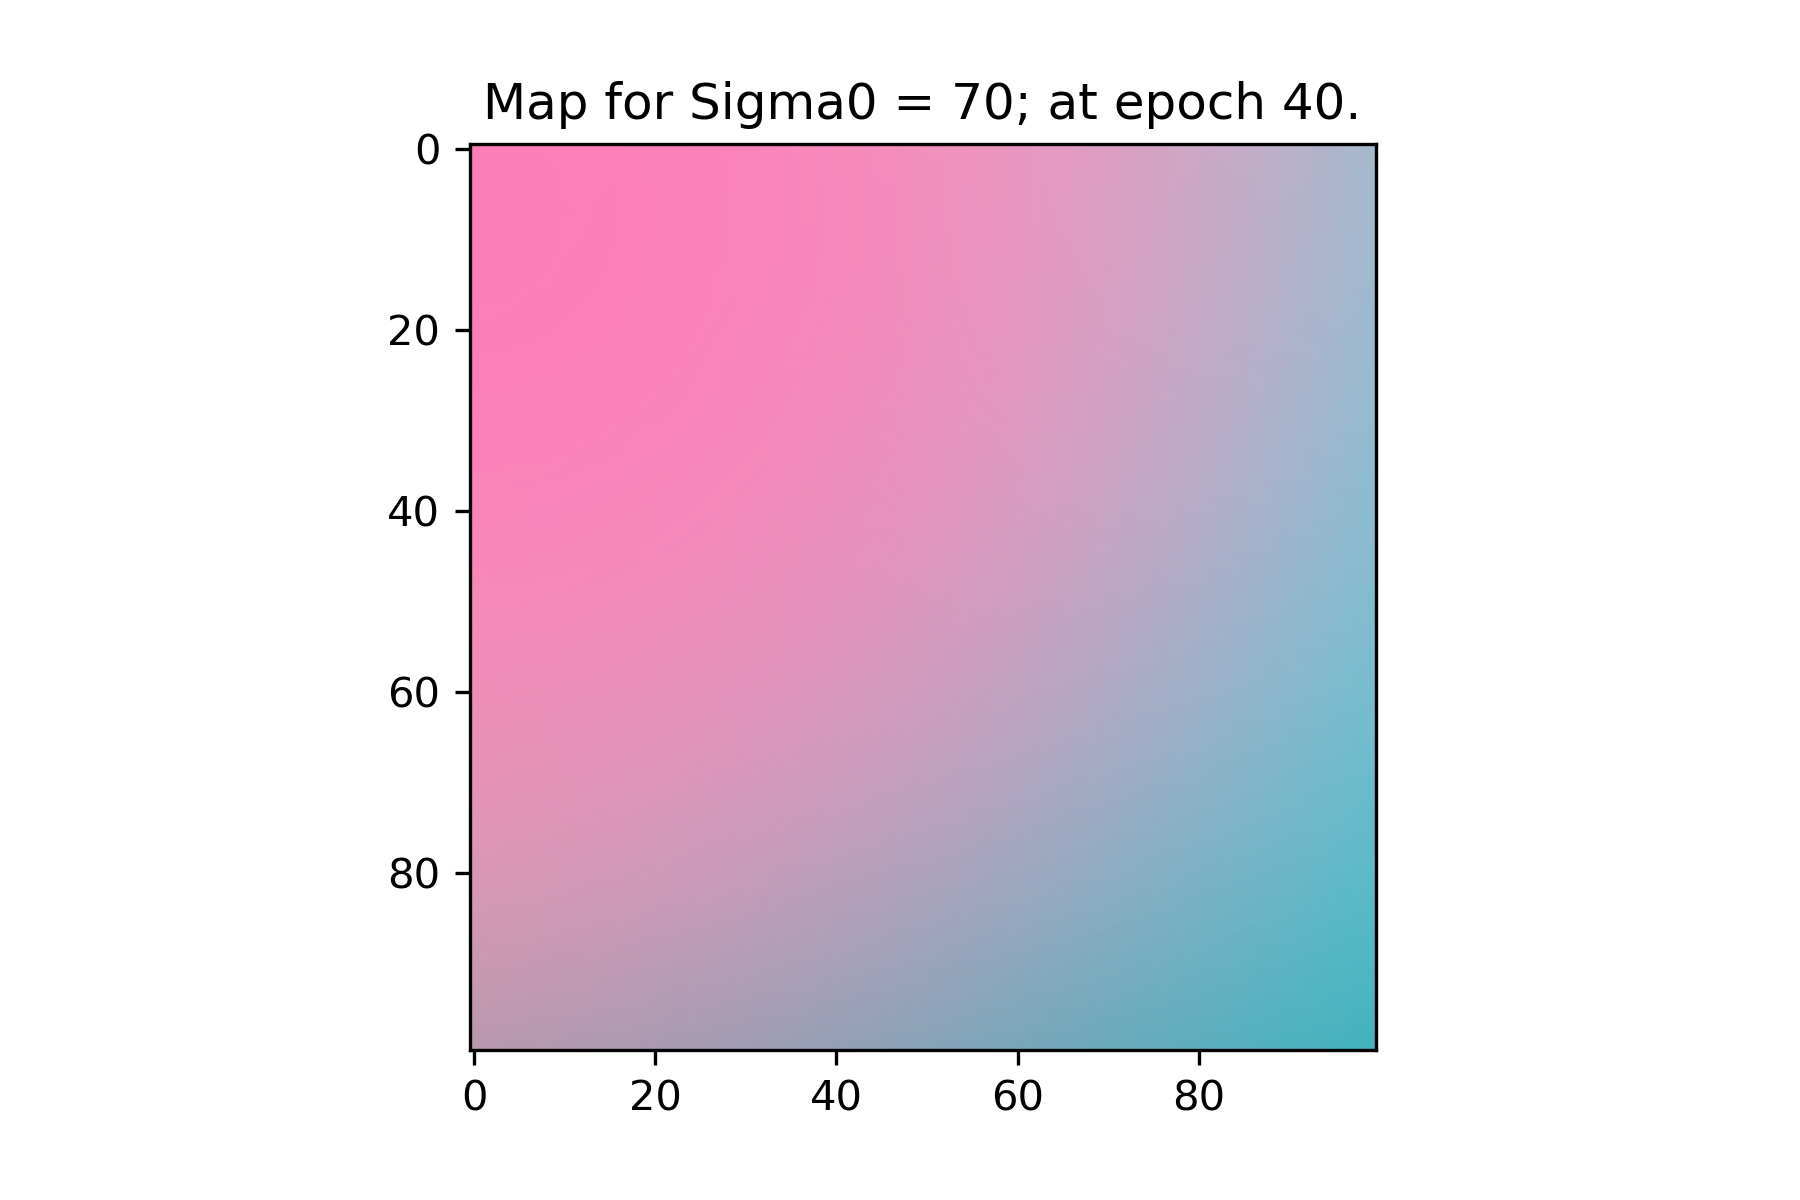

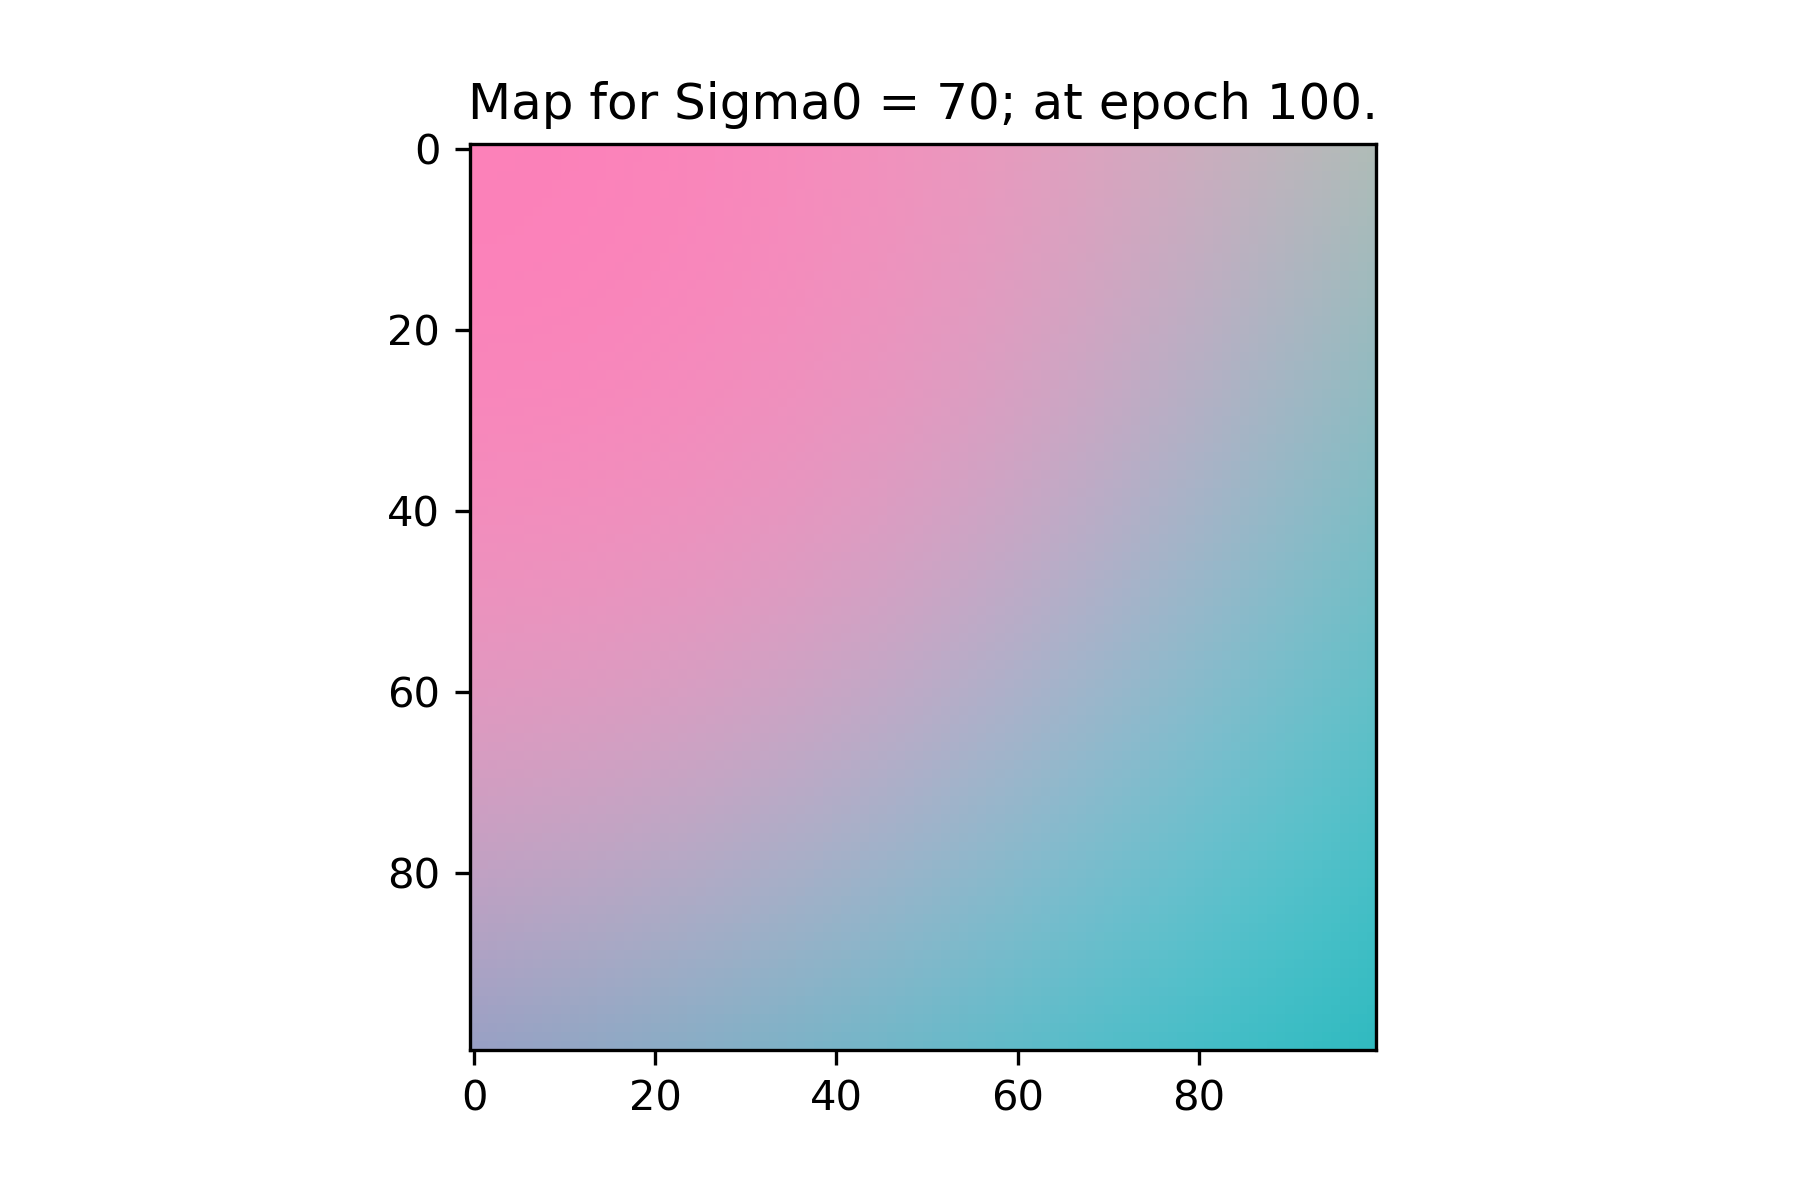

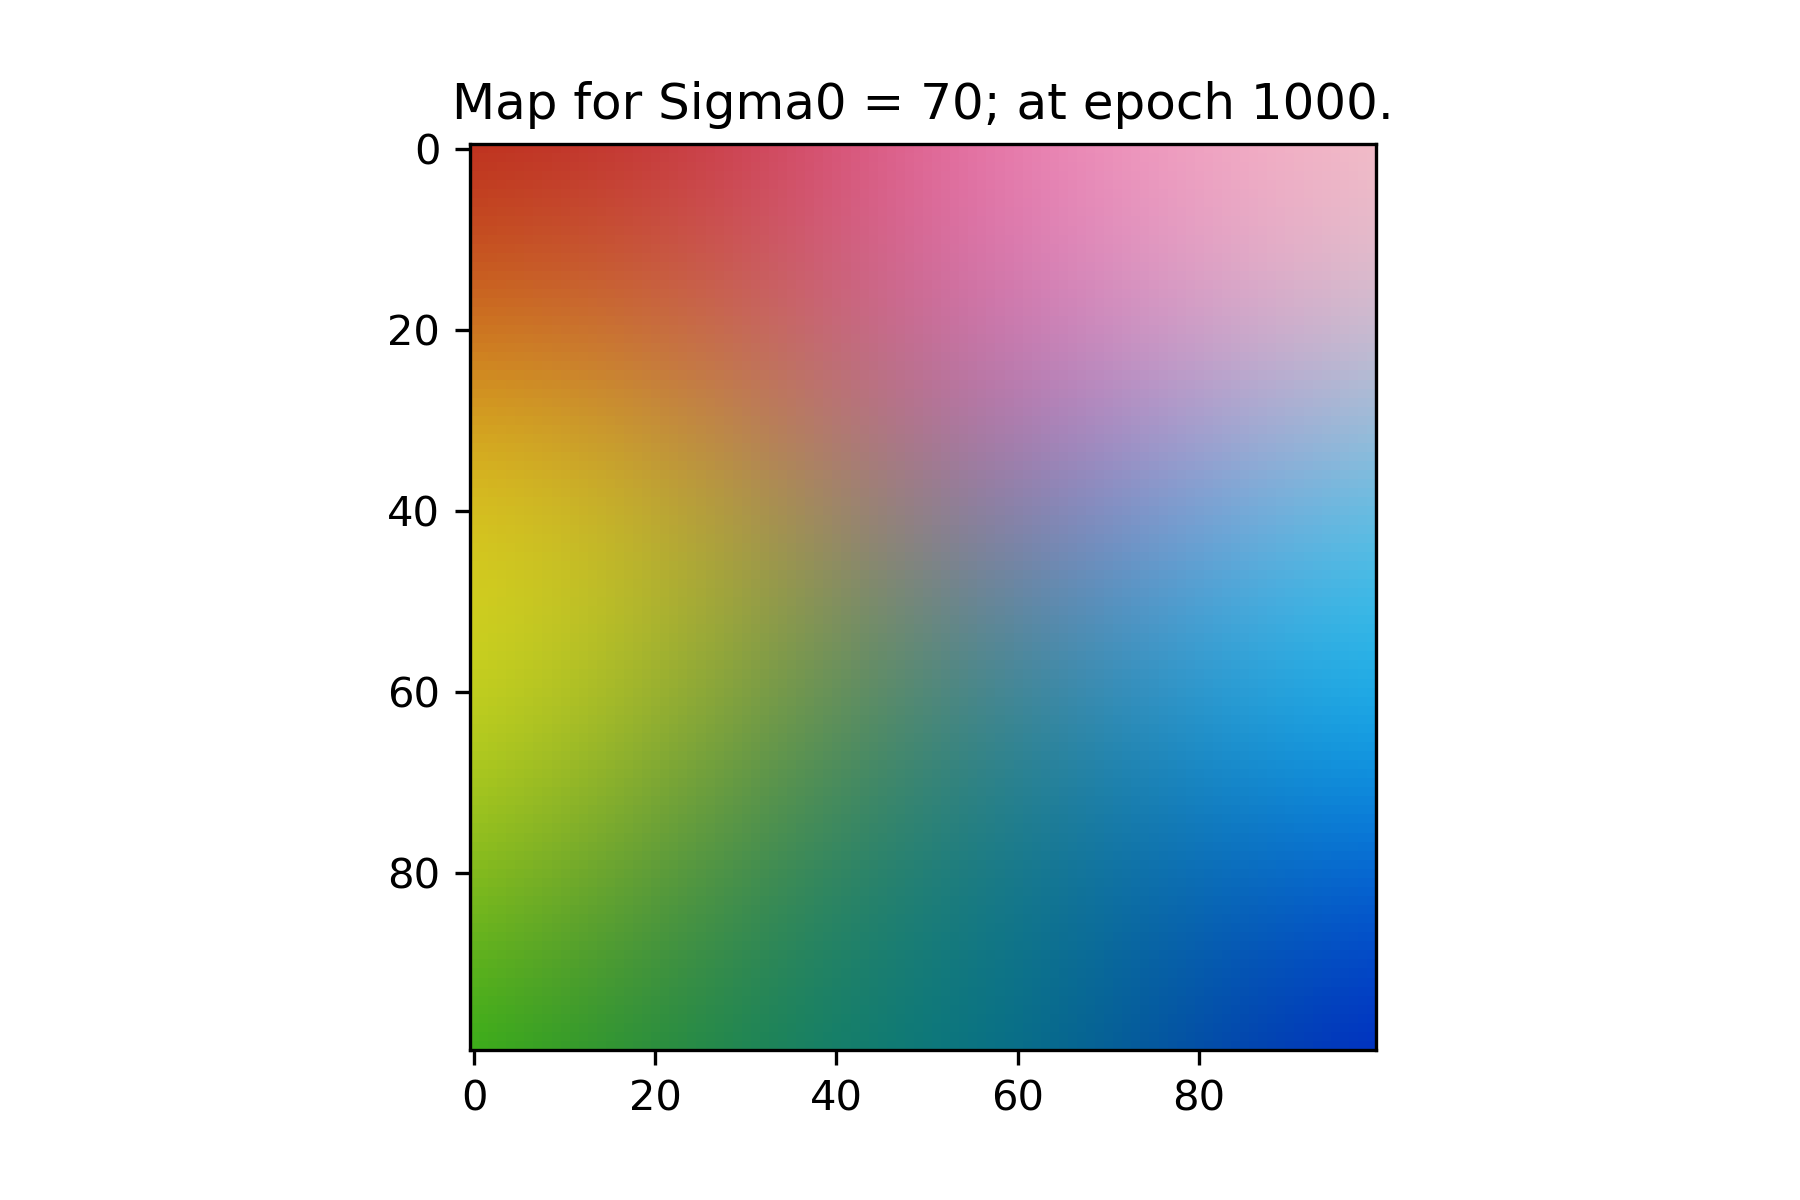

# b) Discussion on Change in output with change in spread parameter (sigma) and number of iterations

Self Organizing Map (SOM) is a data visualization technique developed in 1980's by Professor Teuvo Kohonen and hence is sometimes also referred to as Kohonen's Map. SOM is a type of artificial neural network that is different from other ANN's in a sense that it applies competitive learning to learn as opposed to error-correction. Neuron weights are adjusted depending on their proximity to the neuron that is most similar to the input. Training the map over several iterations of input would update the weights so that similar neurons are grouped closer to each other.

#### Change based on spread parameter:

In case of small values of spread parameter sigma (like sigma = 1), the winning node will significantly update very few of its neighbours, and hence we see that very small clusters are formed, and a lot noise from the initialization of the map still remains. We see that with subsequent iterations there is a very small increase in the size of clusters, and that there is not much visible difference between the map of the 20th iteration and the map of the 1000th iteration.



In case of larger values of spread parameter sigma (like sigma = 50 or 70), we observe that winning node will have a larger neighbourhood of significant impact. This results in the overlapping of clusters and we observe colors in a difused manner.



In case of values of spread parameter that are neither too high or low (like sigma = 10), we observe that the winning node has impact on a larger region than in case of sigma = 1, but it is not so large to result in overlapping of clusters and hence we see a large number of distinct clusters with very little noise.

#### Change based on number of epochs:

As mentioned above, training map over several iterations would result in similar neurons getting grouped together. We observe that in each case (of spread parameter), as the number of iterations progressed, the noise in the map reduced and the grouping was increasingly better.

# References

1) https://towardsdatascience.com/self-organizing-maps-ff5853a118d4

2) https://www.cs.hmc.edu/~kpang/nn/som.html

3) https://github.com/abhinavralhan/kohonen-maps/blob/master/som-random.ipynb

# Changing value of sigma0:

The value of sigma0 can be changed in the function returnSigma0(). However, this function should always return a list.